In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
variable = "mlotst"
print(variable)
model = "IPSL-CM6A-LR"
print(model)
experiment = "ssp585"
print(experiment)
freq = "Omon"
print(freq)

mlotst
IPSL-CM6A-LR
ssp585
Omon


In [5]:
nc = Dataset("Data/Raw/mlotst_Omon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gn_201501-210012.nc")
unit = getattr(nc.variables[variable], "units")
unit

'm'

## Interpolation


In [6]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)

mlotst_Omon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gn_201501-210012.nc
mlotst_Omon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gn_210101-230012.nc


mlotst_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_gn_185001-201412.nc


In [7]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/mlotst_Omon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (362x332) to lonlat (360x180) grid, with source mask (65294)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 2 variables over 1032 timesteps.
cdo    remapdis: Processed 124029888 values from 1 variable over 1032 timesteps [14.68s 210MB].


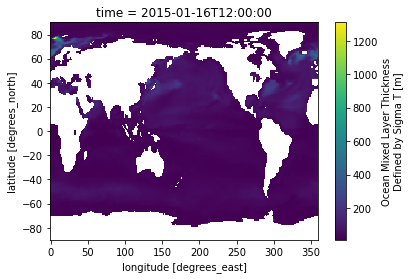

In [8]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [9]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/mlotst_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_gn_185001-201412.nc Data/{variable}_{model}_historical_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (362x332) to lonlat (360x180) grid, with source mask (65294)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 2 variables over 1980 timesteps.
cdo    remapdis: Processed 237964320 values from 1 variable over 1980 timesteps [24.18s 222MB].


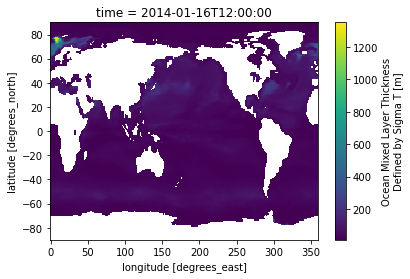

In [10]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## 20 year below -40S 

#### historical

In [11]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
historical = historical.sel(lat = slice(-90, -40))

In [12]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
#historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped

<xarray.Dataset>
Dimensions:    (time: 240, bnds: 2, lon: 360, lat: 50)
Coordinates:
  * time       (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    mlotst     (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:15:06 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:14Z
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    NCO:                    "4.6.0"
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [13]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan ... 64.13 63.6 63.39 63.51

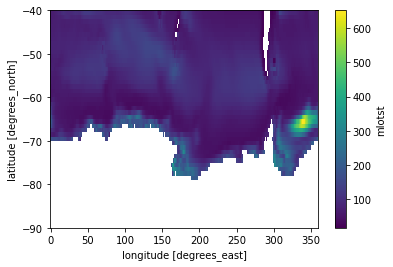

In [14]:
historical_mean[variable].plot()

In [15]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr_whole.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [16]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [17]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer

<xarray.Dataset>
Dimensions:  (time: 20, lon: 360, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 1995-12-01 1996-12-01 ... 2014-12-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Data variables:
    mlotst   (time, lat, lon) float32 nan nan nan nan ... 38.94 39.03 39.02

In [18]:
historical_summer = historical_summer.mean("time")
historical_summer.to_netcdf(path = "Data/{}_{}_historical_20yr_summer_whole.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [19]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))

In [20]:
historical_winter = historical_winter.mean("time")
historical_winter.to_netcdf(path = "Data/{}_{}_historical_20yr_winter_whole.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### ssp585

In [21]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
new = new.sel(lat = slice(-90, -40))

In [22]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
#new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped

<xarray.Dataset>
Dimensions:    (time: 240, bnds: 2, lon: 360, lat: 50)
Coordinates:
  * time       (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    mlotst     (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:14:44 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [23]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan ... 64.42 63.16 62.55 62.35

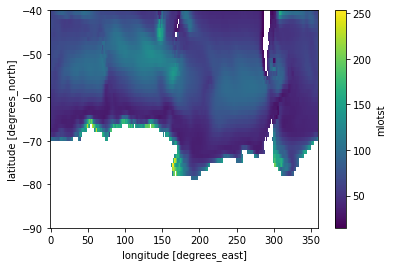

In [24]:
new_mean[variable].plot()

In [25]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [26]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [27]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:  (time: 20, lon: 360, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 2081-12-01 2082-12-01 ... 2100-12-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Data variables:
    mlotst   (time, lat, lon) float32 nan nan nan nan ... 24.62 24.18 23.43

In [28]:
new_summer = new_summer.mean("time")
new_summer.to_netcdf(path = "Data/{}_{}_{}_20yr_summer_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [29]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:  (time: 20, lon: 360, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 2081-06-01 2082-06-01 ... 2100-06-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Data variables:
    mlotst   (time, lat, lon) float32 nan nan nan nan ... 77.56 78.54 80.12

In [30]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan ... 82.49 82.92 83.66 84.71

In [31]:
new_winter.to_netcdf(path = "Data/{}_{}_{}_20yr_winter_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### 20 year Difference 

In [32]:
# Calculate percentage difference
historical = xarray.open_dataset("Data/{}_{}_historical_20yr_whole.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr_whole.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan ... 0.297 -0.437 -0.8389 -1.159

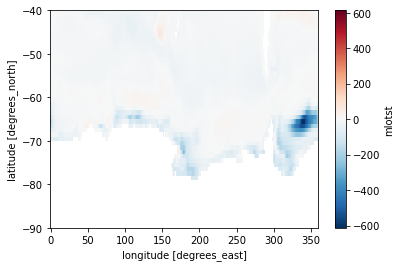

In [33]:
difference = new - historical
difference[variable].plot()
difference

In [34]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

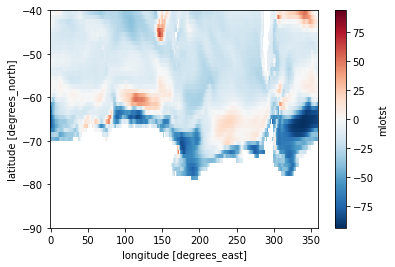

In [35]:
percentage = (difference/historical)*100
percentage[variable].plot()

In [36]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summer

In [37]:
# summer
historical_summer = xarray.open_dataset("Data/{}_{}_historical_20yr_summer_whole.nc".format(variable, model))
new_summer = xarray.open_dataset("Data/{}_{}_{}_20yr_summer_whole.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan ... -5.738 -5.709 -5.704 -5.868

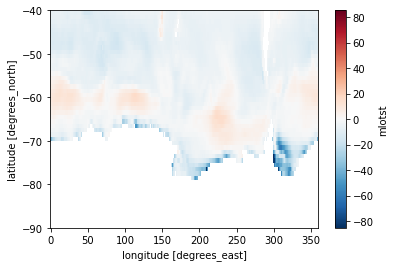

In [38]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

In [39]:
difference_summer.to_netcdf(path = "Data/{}_{}_{}_absolute_summer_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

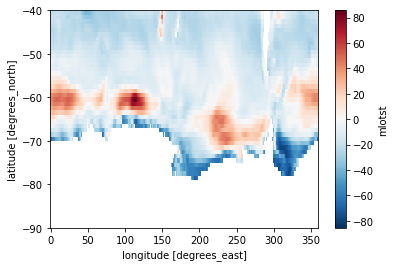

In [40]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

In [41]:
percentage_summer.to_netcdf(path = "Data/{}_{}_{}_percentage_summer_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Winter


In [42]:
# Winter
historical_winter = xarray.open_dataset("Data/{}_{}_historical_20yr_winter_whole.nc".format(variable, model))
new_winter = xarray.open_dataset("Data/{}_{}_{}_20yr_winter_whole.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan ... -4.715 -4.588 -4.615 -4.764

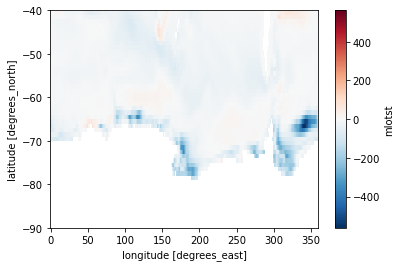

In [43]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

In [44]:
difference_winter.to_netcdf(path = "Data/{}_{}_{}_absolute_winter_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

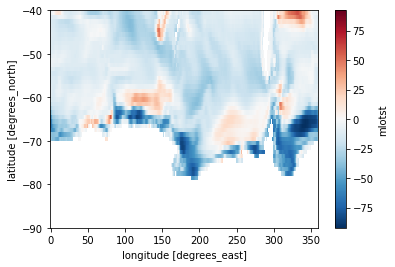

In [45]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

In [46]:
percentage_winter.to_netcdf(path = "Data/{}_{}_{}_percentage_winter_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summary values

In [61]:
mean = (percentage.mean())[variable].values
max_value = (percentage.max())[variable].values
min_value = (percentage.min())[variable].values

mean_abs = (difference.mean())[variable].values
max_value_abs = (difference.max())[variable].values
min_value_abs = (difference.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}".format(mean, mean_abs, 
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))

Mean change = 11.201618194580078% 1.8073502694448962e-09
 Max inc = 405.0292053222656% 4.89294471606172e-08
 Max dec = -29.190263748168945% -3.2163725904865714e-08


In [62]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("{} {}\n\nOverall:\nMean change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(variable, model,
                                                                                                                                   mean, mean_abs, 
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))
summary.close()

In [63]:
mean_summer = (percentage_summer.mean())[variable].values
max_value_summer = (percentage_summer.max())[variable].values
min_value_summer = (percentage_summer.min())[variable].values

mean_abs_winter = (difference_winter.mean())[variable].values
max_value_abs_winter = (difference_winter.max())[variable].values
min_value_abs_winter = (difference_winter.min())[variable].values


In [64]:
mean_winter = (percentage_winter.mean())[variable].values
max_value_winter = (percentage_winter.max())[variable].values
min_value_winter = (percentage_winter.min())[variable].values

mean_abs_summer = (difference_summer.mean())[variable].values
max_value_abs_summer = (difference_summer.max())[variable].values
min_value_abs_summer = (difference_summer.min())[variable].values

In [65]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("n\nSummer:\nMean change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_summer, mean_abs_summer, 
                                                                                                          max_value_summer, max_value_abs_summer,
                                                                                                          min_value_summer, min_value_abs_summer))
summary.close()

In [66]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("\n\nWinter:\nMean change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_winter, mean_abs_winter, 
                                                                                                          max_value_winter, max_value_abs_winter,
                                                                                                          min_value_winter, min_value_abs_winter))
summary.close()

## Sea ice selection

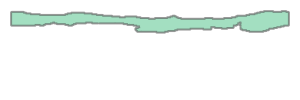

In [47]:
shape = gpd.read_file("Shapes/{}_extended_ice_margin.shp".format(model), crs = "EPSG:4326")
shape['geometry'][0]

In [48]:
ice = gpd.GeoSeries(shape['geometry'][0])

##### ssp585

In [49]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:14:44 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [50]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    mlotst       (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:14:44 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [51]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

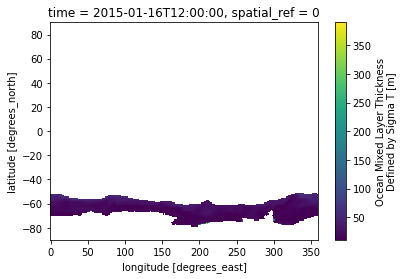

In [52]:
plot = clipped.sel(time = "2015-01")
plot[variable].plot()

In [53]:
clipped.to_netcdf(path = "Data/{}_{}_{}_cropped.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

##### historical


In [54]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1980, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:15:06 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:14Z
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    NCO:                    "4.6.0"
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [55]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1980, lon: 360, lat: 180)
Coordinates:
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    mlotst       (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:15:06 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:14Z
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    NCO:                    "4.6.0"
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [56]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

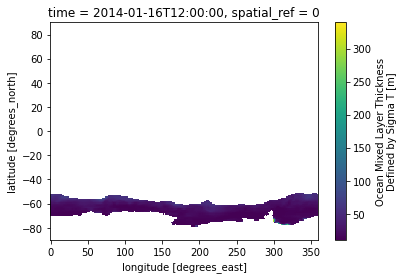

In [57]:
plot = clipped.sel(time = "2014-01")
plot[variable].plot()

In [58]:
clipped.to_netcdf(path = "Data/{}_{}_historical_cropped.nc".format(variable, model), mode = "w", format = "NETCDF4")

## 20 year of sea ice area 

#### historical

In [59]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1980)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
Data variables:
    spatial_ref  int64 ...
    mlotst       (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:15:06 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:14Z
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    NCO:                    "4.6.0"
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [60]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:15:06 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:14Z
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    NCO:                    "4.6.0"
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [61]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

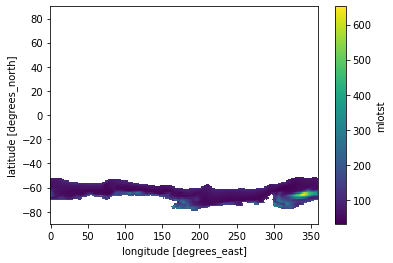

In [62]:
historical_mean[variable].plot()

In [63]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [64]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [65]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1995-12-01 1996-12-01 ... 2014-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [66]:
historical_summer = historical_summer.mean("time")
historical_summer.to_netcdf(path = "Data/{}_{}_historical_20yr_summer.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [67]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))

In [68]:
historical_winter = historical_winter.mean("time")
historical_winter.to_netcdf(path = "Data/{}_{}_historical_20yr_winter.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### ssp585

In [69]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
Data variables:
    spatial_ref  int64 ...
    mlotst       (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:14:44 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [70]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:14:44 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [71]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

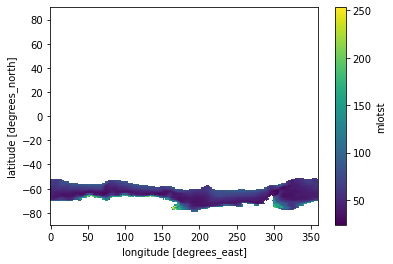

In [72]:
new_mean[variable].plot()

In [73]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [74]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [75]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-12-01 2082-12-01 ... 2100-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [76]:
new_summer = new_summer.mean("time")
new_summer.to_netcdf(path = "Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [77]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-06-01 2082-06-01 ... 2100-06-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [78]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [79]:
new_winter.to_netcdf(path = "Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### 20 year Difference 

In [80]:
# Calculate percentage difference
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

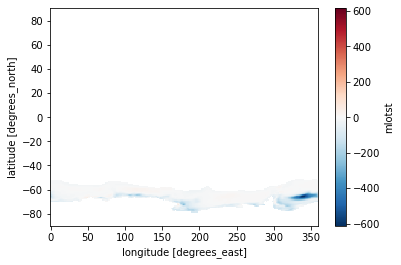

In [81]:
difference = new - historical
difference[variable].plot()
difference

In [82]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

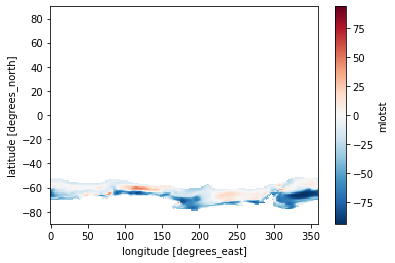

In [83]:
percentage = (difference/historical)*100
percentage[variable].plot()

In [84]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summer

In [85]:
# summer
historical_summer = xarray.open_dataset("Data/{}_{}_historical_20yr_summer.nc".format(variable, model))
new_summer = xarray.open_dataset("Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

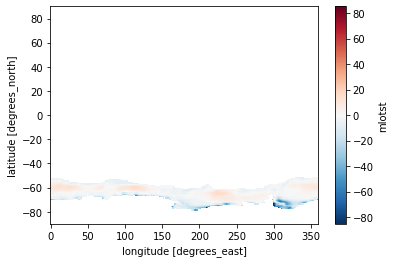

In [86]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

In [87]:
difference_summer.to_netcdf(path = "Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

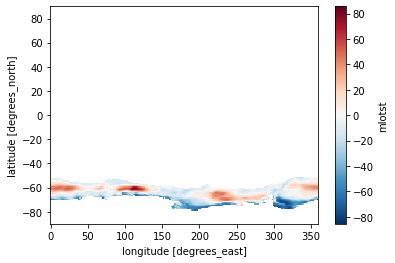

In [88]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

In [89]:
percentage_summer.to_netcdf(path = "Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Winter


In [90]:
# Winter
historical_winter = xarray.open_dataset("Data/{}_{}_historical_20yr_winter.nc".format(variable, model))
new_winter = xarray.open_dataset("Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

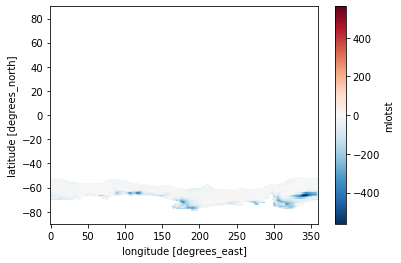

In [91]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

In [92]:
difference_winter.to_netcdf(path = "Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

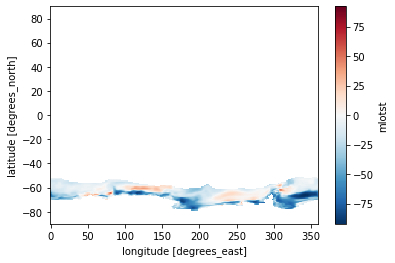

In [93]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

In [94]:
percentage_winter.to_netcdf(path = "Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summary values

In [151]:
mean = (percentage.mean())[variable].values
max_value = (percentage.max())[variable].values
min_value = (percentage.min())[variable].values

mean_abs = (difference.mean())[variable].values
max_value_abs = (difference.max())[variable].values
min_value_abs = (difference.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}".format(mean, mean_abs, 
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))

Mean change = 11.201618194580078% 1.8073502694448962e-09
 Max inc = 405.0292053222656% 4.89294471606172e-08
 Max dec = -29.190263748168945% -3.2163725904865714e-08


In [152]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("{} {}\n\nOverall:\nMean change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(variable, model,
                                                                                                                                   mean, mean_abs, 
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))
summary.close()

In [153]:
mean_summer = (percentage_summer.mean())[variable].values
max_value_summer = (percentage_summer.max())[variable].values
min_value_summer = (percentage_summer.min())[variable].values

mean_abs_winter = (difference_winter.mean())[variable].values
max_value_abs_winter = (difference_winter.max())[variable].values
min_value_abs_winter = (difference_winter.min())[variable].values


In [154]:
mean_winter = (percentage_winter.mean())[variable].values
max_value_winter = (percentage_winter.max())[variable].values
min_value_winter = (percentage_winter.min())[variable].values

mean_abs_summer = (difference_summer.mean())[variable].values
max_value_abs_summer = (difference_summer.max())[variable].values
min_value_abs_summer = (difference_summer.min())[variable].values

In [155]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("n\nSummer:\nMean change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_summer, mean_abs_summer, 
                                                                                                          max_value_summer, max_value_abs_summer,
                                                                                                          min_value_summer, min_value_abs_summer))
summary.close()

In [156]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("\n\nWinter:\nMean change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_winter, mean_abs_winter, 
                                                                                                          max_value_winter, max_value_abs_winter,
                                                                                                          min_value_winter, min_value_abs_winter))
summary.close()

## Export region selection 

#### Apply mask

In [96]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

##### Increasing

In [97]:
nc = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    spatial_ref  int64 0
Data variables:
    mlotst       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:14:44 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

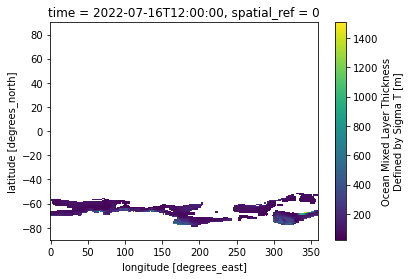

In [98]:
plotting = inc_area.sel(time = "2022-07")
plotting[variable].plot()

In [99]:
vars_list = list(inc_area.data_vars)  
for var in vars_list:  
    del inc_area[var].attrs['grid_mapping']


inc_area.to_netcdf(path = "Data/{}_{}_{}_inc.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

##### Decreasing

In [100]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    spatial_ref  int64 0
Data variables:
    mlotst       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:14:44 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

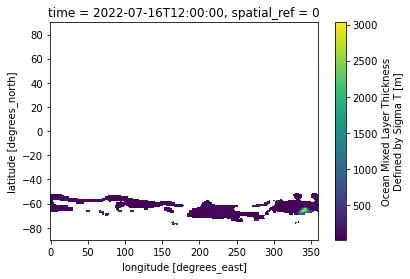

In [101]:
plotting = dec_area.sel(time = "2022-07")
plotting[variable].plot()

In [102]:
vars_list = list(dec_area.data_vars)  
for var in vars_list:  
    del dec_area[var].attrs['grid_mapping']


dec_area.to_netcdf(path = "Data/{}_{}_{}_dec.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Zonal Percentage Change Summary 

In [103]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

##### Increasing

In [29]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    depth        float64 ...
    spatial_ref  int64 0
Data variables:
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

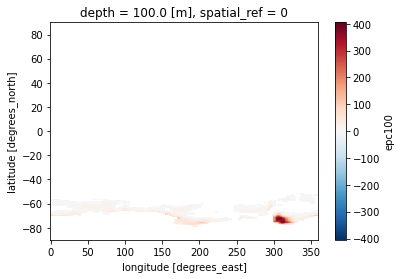

In [30]:
inc_area[variable].plot()

In [31]:
ab = xarray.open_dataset("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))

ab.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
ab.rio.write_crs("epsg:4326", inplace=True)

ab_inc_area = ab.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    depth        float64 ...
    spatial_ref  int64 0
Data variables:
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

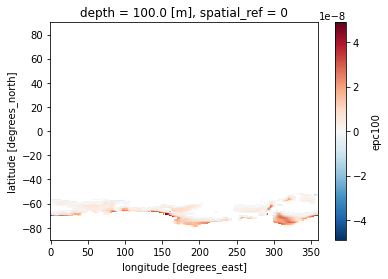

In [32]:
ab_inc_area[variable].plot()

In [33]:
inc_mean = (inc_area.mean())[variable].values
inc_max_value = (inc_area.max())[variable].values
inc_min_value = (inc_area.min())[variable].values

inc_mean_abs = (ab_inc_area.mean())[variable].values
inc_max_value_abs = (ab_inc_area.max())[variable].values
inc_min_value_abs = (ab_inc_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))

Mean change = 23.277507781982422% 5.714625217478897e-09
 Max inc = 405.0292053222656% 4.89294471606172e-08
 Max dec = -26.931880950927734% -2.8236371463208343e-08



In [34]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone:\nMean change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))
summary.close()

##### Decreasing

In [35]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    depth        float64 ...
    spatial_ref  int64 0
Data variables:
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

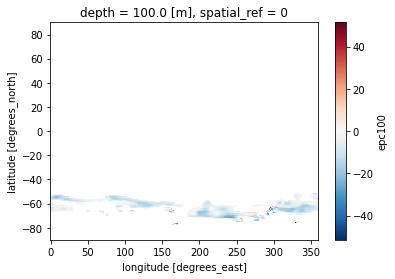

In [36]:
dec_area[variable].plot()

In [37]:
ab_dec_area = ab.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    depth        float64 ...
    spatial_ref  int64 0
Data variables:
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

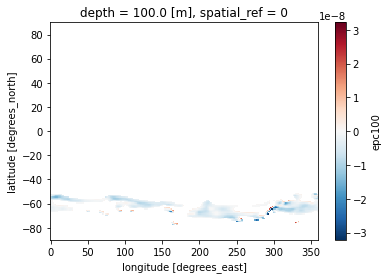

In [38]:
ab_dec_area[variable].plot()

In [39]:
dec_mean = (dec_area.mean())[variable].values
dec_max_value = (dec_area.max())[variable].values
dec_min_value = (dec_area.min())[variable].values

dec_mean_abs = (ab_dec_area.mean())[variable].values
dec_max_value_abs = (ab_dec_area.max())[variable].values
dec_min_value_abs = (ab_dec_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))

Mean change = -6.372518539428711% -3.3385754161230352e-09
 Max inc = 51.46656036376953% 2.5729448793754273e-08
 Max dec = -29.190263748168945% -3.2163725904865714e-08



In [40]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nDecreasing zone:\nMean change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))
summary.close()

## Absolute map

##### historical

In [104]:
# Annual mean at 2014
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical = historical.drop_vars("spatial_ref")
historical

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1980)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:15:06 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:14Z
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    NCO:                    "4.6.0"
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [105]:
historical_end = historical.sel(time = "2014")
historical_end

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 12)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2014-01-16T12:00:00 ... 2014-12-16T12:00:00
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:15:06 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:14Z
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    NCO:                    "4.6.0"
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, year: 1)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * year     (year) int64 2014
Data variables:
    mlotst   (year, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

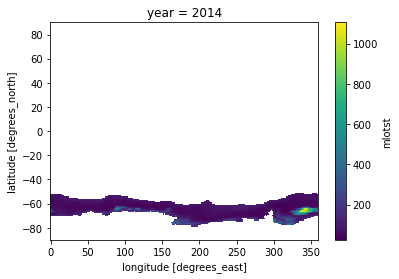

In [106]:
historical_mean = historical_end.groupby("time.year").mean("time")
historical_mean[variable].plot()
historical_mean

In [107]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_2014.nc".format(variable, model), mode = "w", format = "NETCDF4")

##### ssp585

In [108]:
# Annual mean at 2100
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new = new.drop_vars("spatial_ref")
new

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:14:44 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [109]:
new_end = new.sel(time = "2100")
new_end

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 12)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2100-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:14:44 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, year: 1)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * year     (year) int64 2100
Data variables:
    mlotst   (year, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

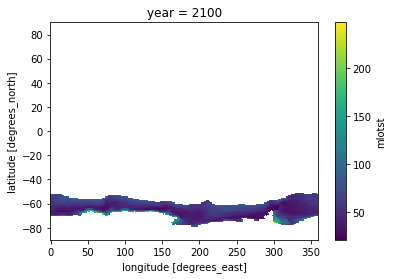

In [110]:
new_mean = new_end.groupby("time.year").mean("time")
new_mean[variable].plot()
new_mean

In [111]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_2100.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

##### Summary values

In [111]:
print("Mean at 2014 is: {}".format(historical_mean.mean()[variable].values))
print("Mean at 2100 is: {}".format(new_mean.mean()[variable].values))

Mean at 2014 is: 1.1655334475335621e-07
Mean at 2100 is: 1.335127421953075e-07


##### Mapping

In [50]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

In [112]:
# Finding max/min value between the two years
old = xarray.open_dataset("Data/{}_{}_historical_2014.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_2100.nc".format(variable, model, experiment))

In [113]:
lat_old = old['lat'].values 
lon_old = old['lon'].values
var_old = old[variable].values

var_old = np.nanmean(var_old, axis = 0) 

old_max = np.nanmax(var_old)
old_min = np.nanmin(var_old)
print(old_max, old_min)


var_old, lon_old = add_cyclic_point(var_old, coord=lon_old)
x, y = np.meshgrid(lon_old, lat_old)

1104.9086 25.289299


/tmp/ipykernel_13666/3715887452.py:5: RuntimeWarning: Mean of empty slice


In [114]:
lat_new = new['lat'].values 
lon_new = new['lon'].values
var_new = new[variable].values

var_new = np.nanmean(var_new, axis = 0) 

new_max = np.nanmax(var_new)
new_min = np.nanmin(var_new)
print(new_max, new_min)


var_new, lon_new = add_cyclic_point(var_new, coord=lon_new)
x_new, y_new = np.meshgrid(lon_new, lat_new)

247.9648 20.92837


/tmp/ipykernel_13666/1500621824.py:5: RuntimeWarning: Mean of empty slice


In [115]:
overall_max = max(old_max, new_max)
overall_min = min(old_min, new_min)
print(overall_max, overall_min)

1104.9086 20.92837


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

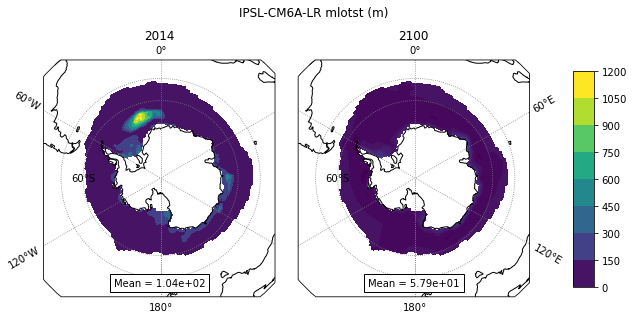

In [116]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2 = fig.add_subplot(1, 2, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                               sharex=ax1, sharey=ax1)
fig.subplots_adjust(wspace=0.1)

plt.suptitle("{} {} ({})".format(model, variable, unit))


# 2014 plot
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text('2014')

p = ax1.contourf(x, y, var_old,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')


mean2014 = AnchoredText("Mean = {0:.2e}".format(historical_mean.mean()[variable].values), loc="lower center")
ax1.add_artist(mean2014)


# 2100 plot
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl2 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl2.left_labels = False

gl2.ylabel_style = {'size': 10}
gl2.xlabel_style = {'size': 10}

gl2.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl2.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax2.title.set_text('2100')

p2 = ax2.contourf(x_new, y_new, var_new,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax2.coastlines()

# ax2.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax2.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

mean2100 = AnchoredText("Mean = {0:.2e}".format(new_mean.mean()[variable].values), loc="lower center")
ax2.add_artist(mean2100)



### Colorbar
fig.subplots_adjust(right=0.8) # Move all subplots 0.2 away from the right
cbar_ax = fig.add_axes([0.86, 0.2, 0.03, 0.6]) # Define position and size of new element (distance from left, distance from bottom, width, height)
fig.colorbar(p, cax=cbar_ax)


plt.savefig("output/{}/{}_{}_2014vs2100.png".format(model, variable, model))

plt.show()

## Percentage Change map

In [117]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
nc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 ...

In [118]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc[variable].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)
label = abs(max([var_min, var_max], key = abs))
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

51.305656 -94.04629


In [58]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

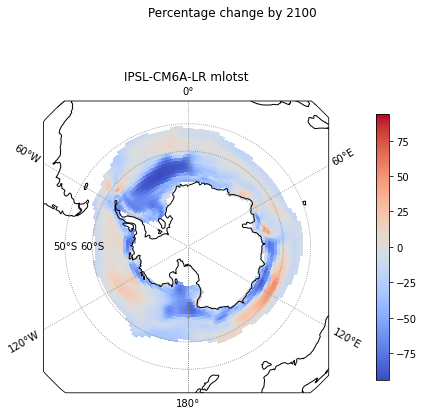

In [119]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text("{} {}".format(model, variable))

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

## Zonal Mean Summary 

### Increasing

In [120]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

In [121]:
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))
new_mean = np.nanmean(new[variable].values)
new_max = np.nanmax(new[variable].values)
new_min = np.nanmin(new[variable].values)
print(new_mean)     

61.75861


In [122]:
new.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
new.rio.write_crs("epsg:4326", inplace=True)

new_inc = new.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)

In [72]:
new_inc_mean = np.nanmean(new_inc[variable].values)
new_inc_max = np.nanmax(new_inc[variable].values)
new_inc_min = np.nanmin(new_inc[variable].values)

print(new_inc_mean, new_inc_max, new_inc_min)

5.0339352e-08 1.9207684e-07 0.0


In [73]:
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
historical_mean = np.nanmean(historical[variable].values)
historical_max = np.nanmax(historical[variable].values)
historical_min = np.nanmin(historical[variable].values)
print(historical_mean)     

4.7554288e-08


In [74]:
historical.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
historical.rio.write_crs("epsg:4326", inplace=True)

historical_inc = historical.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)

In [75]:
historical_inc_mean = np.nanmean(historical_inc[variable].values)
historical_inc_max = np.nanmax(historical_inc[variable].values)
historical_inc_min = np.nanmin(historical_inc[variable].values)

print(historical_inc_mean, historical_inc_max, historical_inc_min)

4.4624727e-08 1.9022869e-07 0.0


### Decreasing

In [76]:
new.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
new.rio.write_crs("epsg:4326", inplace=True)

new_dec = new.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)

In [77]:
new_dec_mean = np.nanmean(new_dec[variable].values)
new_dec_max = np.nanmax(new_dec[variable].values)
new_dec_min = np.nanmin(new_dec[variable].values)

print(new_dec_mean, new_dec_max, new_dec_min)

4.8772446e-08 1.9207684e-07 2.599338e-08


In [78]:
historical.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
historical.rio.write_crs("epsg:4326", inplace=True)

historical_dec = historical.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)

In [79]:
historical_dec_mean = np.nanmean(historical_dec[variable].values)
historical_dec_max = np.nanmax(historical_dec[variable].values)
historical_dec_min = np.nanmin(historical_dec[variable].values)

print(historical_dec_mean, historical_dec_max, historical_dec_min)

5.2111027e-08 1.9022869e-07 2.6142713e-08


In [80]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nOverall:\nNew mean = {}m\nNew max = {}m\nNew min = {}m".format(new_mean, new_max, new_min))
summary.write("\n\nHistorical mean = {}m\nHistorical max = {}m\nHistorical min = {}m".format(historical_mean, historical_max, historical_min))

summary.write("\n\n\nIncreasing zone:\nNew mean = {}m\nNew max = {}m\nNew min = {}m".format(new_inc_mean, new_inc_max, new_inc_min))
summary.write("\n\nHistorical mean = {}m\nHistorical max = {}m\nHistorical min = {}m".format(historical_inc_mean, historical_inc_max, historical_inc_min))

summary.write("\n\n\nDecreasing zone:\nNew mean = {}m\nNew max = {}m\nNew min = {}m".format(new_dec_mean, new_dec_max, new_dec_min))
summary.write("\n\nHistorical mean = {}m\nHistorical max = {}m\nHistorical min = {}m".format(historical_dec_mean, historical_dec_max, historical_dec_min))
summary.close()

## Mean regression 

### Total


In [123]:
# Change in annual mean value 
nc = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
nc = nc.drop_vars("spatial_ref")
nc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:14:44 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [124]:
spatial_mean = nc.groupby("time").mean(["lat", "lon"])
spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    mlotst   (time) float32 21.73 25.82 36.62 49.35 ... 96.1 94.76 68.12 31.05

In [125]:
year_mean = spatial_mean.groupby("time.year").mean("time")
year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    mlotst   (year) float32 96.81 94.56 84.52 98.23 ... 58.11 59.05 56.09 57.86

In [126]:
var_mean = year_mean[variable].values

In [127]:
time = year_mean['year'].values
time

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
       2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058,
       2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
       2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080,
       2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100])

In [128]:
yearly_summer = []
yearly_winter = []

In [129]:
for i in time:
    year = spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    yearly_summer.append(summer)
    yearly_winter.append(winter)
    

In [130]:
data = {'Year': time,
        'Annual': var_mean,
        'Summer': yearly_summer,
        'Winter': yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,96.810661,25.677538,128.156601,IPSL-CM6A-LR
1,2016,94.560051,22.214928,111.484535,IPSL-CM6A-LR
2,2017,84.524345,23.613970,104.344940,IPSL-CM6A-LR
3,2018,98.227974,24.933752,117.324394,IPSL-CM6A-LR
4,2019,96.326302,24.469650,118.938423,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,59.284500,25.064041,79.311104,IPSL-CM6A-LR
82,2097,58.106701,25.136908,78.183311,IPSL-CM6A-LR
83,2098,59.054840,25.568390,78.579750,IPSL-CM6A-LR
84,2099,56.092640,25.883989,74.680489,IPSL-CM6A-LR


In [131]:
df.to_csv("csv/{}_{}_whole.csv".format(model, variable), index = False, header=True)

#### Plotting


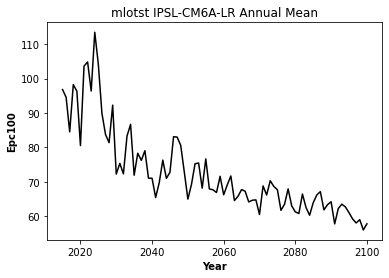

In [132]:
fig, ax = plt.subplots()

ax.plot(time, var_mean, 'k')
#ax.plot(time, yearly_summer, 'r')
#ax.plot(time, yearly_winter, 'b')

ax.title.set_text("{} {} Annual Mean".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_annual_mean.png".format(variable, model, experiment))

plt.show()

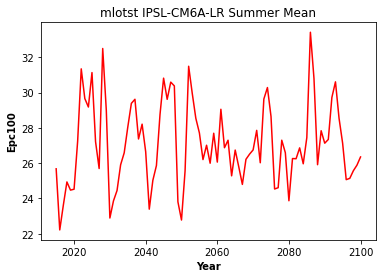

In [133]:
fig, ax = plt.subplots()

#ax.plot(time, var_mean, 'k')
ax.plot(time, yearly_summer, 'r')
#ax.plot(time, yearly_winter, 'b')

ax.title.set_text("{} {} Summer Mean".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_summer_mean.png".format(variable, model, experiment))

plt.show()

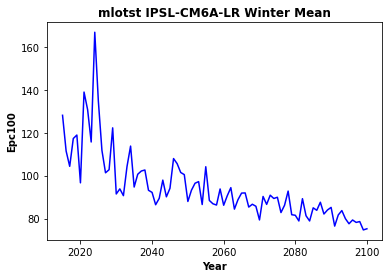

In [134]:
fig, ax = plt.subplots()

#ax.plot(time, var_mean, 'k')
#ax.plot(time, yearly_summer, 'r')
ax.plot(time, yearly_winter, 'b')

plt.title("{} {} Winter Mean".format(variable, model),fontweight="bold")

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_winter_mean.png".format(variable, model, experiment))

plt.show()

In [93]:
annual_inflection = 2034.4

annual_point = np.where(time == int(annual_inflection))[0].tolist()
annual_label = int(annual_inflection)
annual_position = (annual_label, var_mean[annual_point][0])


summer_inflection = 2052.9

summer_point = np.where(time == int(summer_inflection))[0].tolist()
summer_label = int(summer_inflection)
summer_position = (summer_label, yearly_summer[summer_point[0]])


# winter_inflection = 2052.9

# winter_point = np.where(time == int(winter_inflection))[0].tolist()
# winter_label = int(winter_inflection)
# winter_position = (winter_label, yearly_winter[winter_point[0]])

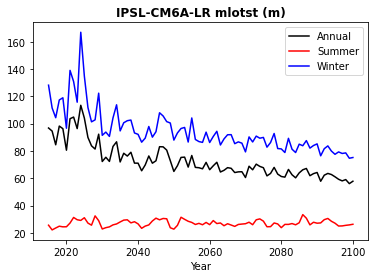

In [135]:
fig, ax = plt.subplots()

ax.plot(time, var_mean, '-k', label = "Annual")
ax.plot(time, yearly_summer, '-r', label = "Summer")
ax.plot(time, yearly_winter, '-b', label = "Winter")

# plt.annotate(annual_label, annual_position, textcoords="offset points", xytext=(0,10), ha='center') 
# plt.annotate(summer_label, summer_position, textcoords="offset points",xytext=(0,12), ha='center') 
# #plt.annotate(winter_label, winter_position, textcoords="offset points",xytext=(0,12), ha='center') 

plt.title("{} {} ({})".format(model, variable, unit), fontweight="bold")

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
#ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

#plt.ylabel("Epc100")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_mean_projection_whole.png".format(model, variable, model, experiment))

plt.show()

### Zonal

##### Increasing zone

In [136]:
inc = xarray.open_dataset("Data/{}_{}_{}_inc.nc".format(variable, model, experiment))
inc = inc.drop_vars("spatial_ref")
inc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:14:44 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [137]:
inc_spatial_mean = inc.groupby("time").mean(["lat", "lon"])
inc_spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    mlotst   (time) float32 20.15 23.92 34.38 50.63 ... 103.8 104.4 73.47 27.74

In [138]:
inc_year_mean = inc_spatial_mean.groupby("time.year").mean("time")
inc_year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    mlotst   (year) float32 107.1 95.55 80.64 93.75 ... 60.65 61.88 57.95 59.32

In [139]:
inc_mean = inc_year_mean[variable].values

In [140]:
time = inc_year_mean['year'].values

In [141]:
inc_yearly_summer = []
inc_yearly_winter = []

In [142]:
for i in time:
    year = inc_spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    inc_yearly_summer.append(summer)
    inc_yearly_winter.append(winter)
    

In [143]:
data = {'Year': time,
        'Annual': inc_mean,
        'Summer': inc_yearly_summer,
        'Winter': inc_yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,107.134186,24.965714,148.844284,IPSL-CM6A-LR
1,2016,95.554314,22.217072,122.875793,IPSL-CM6A-LR
2,2017,80.635773,22.835733,106.784180,IPSL-CM6A-LR
3,2018,93.751129,23.701548,120.473549,IPSL-CM6A-LR
4,2019,97.320320,24.257576,130.419205,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,62.238613,22.174036,84.659523,IPSL-CM6A-LR
82,2097,60.647007,22.094635,83.305336,IPSL-CM6A-LR
83,2098,61.882465,22.809778,84.011185,IPSL-CM6A-LR
84,2099,57.953945,22.788397,78.474373,IPSL-CM6A-LR


In [144]:
df.to_csv("csv/{}_{}_inc.csv".format(model, variable), index = False, header=True)

##### Decreasing zone

In [145]:
dec = xarray.open_dataset("Data/{}_{}_{}_dec.nc".format(variable, model, experiment))
dec = dec.drop_vars("spatial_ref")
dec

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 19:14:44 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [146]:
dec_spatial_mean = dec.groupby("time").mean(["lat", "lon"])
dec_spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    mlotst   (time) float32 23.61 28.15 38.69 46.38 ... 84.22 80.03 58.4 35.42

In [147]:
dec_year_mean = dec_spatial_mean.groupby("time.year").mean("time")
dec_year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    mlotst   (year) float32 85.29 94.51 89.2 102.5 ... 54.04 54.23 52.42 54.81

In [148]:
dec_mean = dec_year_mean[variable].values

In [149]:
dec_yearly_summer = []
dec_yearly_winter = []

In [150]:
for i in time:
    year = dec_spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    dec_yearly_summer.append(summer)
    dec_yearly_winter.append(winter)
    

In [151]:
time = dec_year_mean['year'].values

In [152]:
data = {'Year': time,
        'Annual': dec_mean,
        'Summer': dec_yearly_summer,
        'Winter': dec_yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,85.294693,26.175985,105.209099,IPSL-CM6A-LR
1,2016,94.510872,21.974852,99.573387,IPSL-CM6A-LR
2,2017,89.202888,24.270243,103.241188,IPSL-CM6A-LR
3,2018,102.503143,25.749941,114.753380,IPSL-CM6A-LR
4,2019,95.707649,24.260660,108.503212,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,54.043442,28.427597,70.681274,IPSL-CM6A-LR
82,2097,54.037247,28.844690,70.606224,IPSL-CM6A-LR
83,2098,54.231167,28.800817,70.195801,IPSL-CM6A-LR
84,2099,52.418304,29.542435,68.317116,IPSL-CM6A-LR


In [153]:
df.to_csv("csv/{}_{}_dec.csv".format(model, variable), index = False, header=True)

##### Plotting

In [212]:
inc_inflection = 2034.4

inc_point = np.where(time == int(inc_inflection))[0].tolist()
inc_label = int(inc_inflection)
inc_position = (inc_label, inc_mean[inc_point][0])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_mean[dec_point][0])

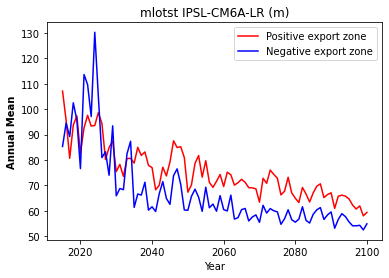

In [154]:
fig, ax = plt.subplots()


ax.plot(time, inc_mean, '-r',  label = "Positive export zone")
ax.plot(time, dec_mean, '-b', label = "Negative export zone")


#plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_annual_projection_by_zone.png".format(model, variable, model, experiment))

plt.show()

In [155]:
inc_inflection = 2052.9

inc_point = np.where(time == int(inc_inflection))[0].tolist()
inc_label = int(inc_inflection)
inc_position = (inc_label, inc_yearly_summer[inc_point[0]])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_yearly_summer[dec_point[0]])

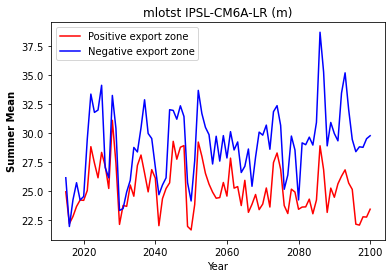

In [156]:
fig, ax = plt.subplots()


ax.plot(time, inc_yearly_summer, '-r', label = "Positive export zone")
ax.plot(time, dec_yearly_summer, '-b', label = "Negative export zone")

#plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_summer_projection_by_zone.png".format(model, variable, model, experiment))

plt.show()

In [216]:
# inc_inflection = 2052.9

# inc_point = np.where(time == int(inc_inflection))[0].tolist()
# inc_label = int(inc_inflection)
# inc_position = (inc_label, inc_yearly_winter[inc_point[0]])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_yearly_winter[dec_point[0]])

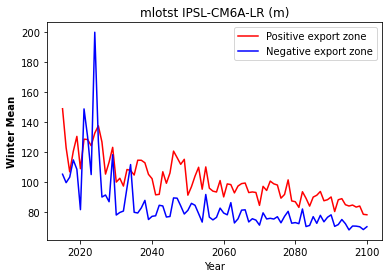

In [157]:
fig, ax = plt.subplots()


ax.plot(time, inc_yearly_winter, 'r', label = "Positive export zone")
ax.plot(time, dec_yearly_winter, 'b', label = "Negative export zone")

#plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_winter_projection_by_zone.png".format(model, variable, model, experiment))

plt.show()

## Correlation with epc100

### 20 year change correlation

#### Percentage

In [6]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
exp_inc_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage.nc".format(model, experiment))

In [7]:
cor_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(-0.21988624)
Coordinates:
    depth    float64 100.0

In [8]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nPercentage correlation with epc100: {}".format(cor_per.values))
summary.close()

#### Absolute

In [9]:
current_inc_abs = xarray.open_dataarray("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))
exp_inc_abs = xarray.open_dataarray("Data/epc100_{}_{}_absolute.nc".format(model, experiment))

In [10]:
cor_abs = xarray.corr(current_inc_abs, exp_inc_abs, dim = ["lat", "lon"])
cor_abs

<xarray.DataArray ()>
array(-0.13342321)
Coordinates:
    depth    float64 100.0

In [11]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\nAbsolute correlation with epc100: {}".format(cor_abs.values))
summary.close()

### Spatial correlation 

#### Increasing zone


In [12]:
current_inc = xarray.open_dataarray("Data/{}_{}_{}_inc.nc".format(variable, model, experiment),decode_coords="all")
current_inc

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'mlotst' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    spatial_ref  int64 ...
Attributes:
    standard_name:       ocean_mixed_layer_thickness_defined_by_sigma_t
    long_name:           Ocean Mixed Layer Thickness Defined by Sigma T
    units:               m
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    description:         Sigma T is potential density referenced to ocean sur...
    history:             none

In [13]:
epc = xarray.open_dataarray("Data/epc100_{}_{}_inc.nc".format(model, experiment), decode_coords="all")
epc

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'epc100' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    depth        float64 ...
    spatial_ref  int64 ...
Attributes:
    standard_name:       sinking_mole_flux_of_particulate_organic_matter_expr...
    long_name:           Downward Flux of Particulate Organic Carbon
    units:               mol m-2 s-1
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    description:         The phrase 'expressed_as' is used in the constructio...
    history:             none

In [14]:
cor_inc = xarray.corr(current_inc, epc, dim = ["lat", "lon"])
cor_inc = cor_inc.groupby("time.year").mean("time")
cor_inc

<xarray.DataArray (year: 86)>
array([-0.20143785, -0.11015932, -0.06803205, -0.08153961, -0.10677659,
       -0.10883797, -0.18078483, -0.13619454, -0.12697731, -0.11733065,
       -0.16280554, -0.159247  , -0.09537512, -0.11777533, -0.12606345,
       -0.1012345 , -0.14756908, -0.05303   , -0.10391194, -0.1506056 ,
       -0.07410729, -0.1604287 , -0.13386425, -0.07837695, -0.12009969,
       -0.10260583, -0.03979833, -0.02303362, -0.06609728, -0.04768914,
       -0.11830382, -0.11541108, -0.10850901, -0.12493879, -0.1938659 ,
       -0.06565009, -0.07358986, -0.1026804 , -0.12360484, -0.04900493,
       -0.10299916, -0.0471469 , -0.05821601, -0.05880485, -0.04060708,
       -0.08582402, -0.091016  , -0.09670545, -0.06907532, -0.14673323,
       -0.13618393, -0.09424153, -0.15817799, -0.07750249, -0.094945  ,
       -0.06433163, -0.04924925, -0.09895071, -0.14317447, -0.12467092,
       -0.10496528, -0.05993228, -0.14165759, -0.09544235, -0.0480486 ,
       -0.04702269, -0.06818068, -0.06402432, -0.04816097, -0.0779863 ,
       -0.14778215, -0.13345835, -0.09066308, -0.10118354, -0.14904652,
       -0.13844613, -0.07217103, -0.10512919, -0.12893195, -0.09562047,
       -0.04197694, -0.07743609, -0.07044679, -0.10039093, -0.10067903,
       -0.04258948])
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100

In [15]:
time = cor_inc["year"].values

In [16]:
current_inc_season = current_inc.resample(time='QS-DEC').mean(dim="time")
current_inc_season['time']

<xarray.DataArray 'time' (time: 345)>
array(['2014-12-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000', ..., '2100-06-01T00:00:00.000000000',
       '2100-09-01T00:00:00.000000000', '2100-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2014-12-01 2015-03-01 ... 2100-12-01
    spatial_ref  int64 0

In [17]:
current_inc_summer = current_inc_season.sel(time=(current_inc_season.time.dt.month == 12))
current_inc_summer = current_inc_summer.sel(time = slice("2015","2100"))

In [18]:
current_inc_winter = current_inc_season.sel(time=(current_inc_season.time.dt.month == 6))

In [19]:
epc_inc_season = epc.resample(time='QS-DEC').mean(dim="time")

In [20]:
epc_inc_summer = epc_inc_season.sel(time=(epc_inc_season.time.dt.month == 12))
epc_inc_summer = epc_inc_summer.sel(time = slice("2015","2100"))
epc_inc_winter = epc_inc_season.sel(time=(epc_inc_season.time.dt.month == 6))

In [21]:
cor_inc_summer = xarray.corr(current_inc_summer, epc_inc_summer, dim = ["lat", "lon"])
cor_inc_summer

<xarray.DataArray (time: 86)>
array([-0.15441542, -0.2671904 , -0.17107154, -0.14532398, -0.22490305,
       -0.21193066, -0.05385812, -0.23324643, -0.14433291, -0.18028774,
       -0.01455663, -0.24508393, -0.06353224, -0.24543674, -0.05782505,
       -0.28704258, -0.25203202, -0.09704419, -0.30807669, -0.17116035,
       -0.21780631, -0.15318458, -0.16863158, -0.17398619, -0.25237784,
       -0.17079502, -0.20770212, -0.25341164, -0.20604703, -0.18695623,
       -0.21843638, -0.16387326, -0.1018121 , -0.22854952, -0.20439934,
       -0.17042687, -0.20511251, -0.20857906, -0.15462588, -0.28775296,
       -0.17213909, -0.09253858, -0.23786596, -0.16771759, -0.23659825,
       -0.17585198, -0.31424204, -0.10131793, -0.22976246, -0.31306201,
       -0.24935636, -0.25028447, -0.24819318, -0.25378424, -0.21338471,
       -0.18572543, -0.32092506, -0.18406431, -0.27598283, -0.23342366,
       -0.1835053 , -0.29575822, -0.22261382, -0.27396134, -0.24163656,
       -0.19683431, -0.24242308, -0.26944413, -0.3107262 , -0.34721153,
       -0.32985823, -0.30033521, -0.30306105, -0.33668434, -0.36414427,
       -0.31595234, -0.28994195, -0.31743613, -0.37600088, -0.20969511,
       -0.27275584, -0.33469663, -0.36077502, -0.34035247, -0.34894548,
       -0.01516008])
Coordinates:
  * time         (time) datetime64[ns] 2015-12-01 2016-12-01 ... 2100-12-01
    spatial_ref  int64 0
    depth        float64 100.0

In [22]:
cor_inc_winter = xarray.corr(current_inc_winter, epc_inc_winter, dim = ["lat", "lon"])
cor_inc_winter

<xarray.DataArray (time: 86)>
array([-0.35389153, -0.21547288, -0.21195104, -0.15064263, -0.19106689,
       -0.17173608, -0.25582936, -0.21889144, -0.16598529, -0.20427741,
       -0.22299945, -0.20153434, -0.23060207, -0.16536605, -0.16907812,
       -0.15386281, -0.12424633, -0.12411974, -0.11996631, -0.26000004,
       -0.05561848, -0.19901262, -0.12982648, -0.10314465, -0.14743319,
       -0.1971549 , -0.14409887, -0.0099595 , -0.111738  , -0.10101496,
       -0.11139725, -0.08574902, -0.08784456, -0.17535268, -0.27996893,
       -0.13913369, -0.19284834, -0.07511774, -0.15816555, -0.09650567,
       -0.13082785, -0.05658255, -0.14684837,  0.01454404, -0.1069336 ,
       -0.08231635, -0.05352148, -0.12393514, -0.07976026, -0.16569002,
       -0.20357147, -0.08736029, -0.13953092, -0.12089511, -0.09017071,
       -0.02190655, -0.03731561, -0.07048026, -0.1439105 , -0.09554065,
       -0.11321278, -0.09517078, -0.1195847 , -0.00677464, -0.04464339,
       -0.07310246, -0.0918904 , -0.01148374, -0.05134566, -0.06100451,
       -0.08223533, -0.08973073, -0.03635742, -0.12711217, -0.13080239,
       -0.11532481, -0.0251533 , -0.08964672, -0.10512236,  0.01041398,
       -0.03554423,  0.0009709 , -0.03847252, -0.03424678, -0.05989822,
       -0.00722824])
Coordinates:
  * time         (time) datetime64[ns] 2015-06-01 2016-06-01 ... 2100-06-01
    spatial_ref  int64 0
    depth        float64 100.0

In [23]:
data = {'Year': time,
        'Annual': cor_inc,
        'Summer': cor_inc_summer,
        'Winter': cor_inc_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,-0.201438,-0.154415,-0.353892,IPSL-CM6A-LR
1,2016,-0.110159,-0.267190,-0.215473,IPSL-CM6A-LR
2,2017,-0.068032,-0.171072,-0.211951,IPSL-CM6A-LR
3,2018,-0.081540,-0.145324,-0.150643,IPSL-CM6A-LR
4,2019,-0.106777,-0.224903,-0.191067,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,-0.077436,-0.334697,0.000971,IPSL-CM6A-LR
82,2097,-0.070447,-0.360775,-0.038473,IPSL-CM6A-LR
83,2098,-0.100391,-0.340352,-0.034247,IPSL-CM6A-LR
84,2099,-0.100679,-0.348945,-0.059898,IPSL-CM6A-LR


In [24]:
df.to_csv("csv/{}_{}_epc100_correlation_inc.csv".format(model, variable), index = False, header=True)

In [20]:
inc_mean = np.nanmean(cor_inc.values)
inc_mean_summer = np.nanmean(cor_inc_summer.values)
inc_mean_winter = np.nanmean(cor_inc_winter.values)

inc_max = np.nanmax(cor_inc.values)
inc_max_summer = np.nanmax(cor_inc_summer.values)
inc_max_winter = np.nanmax(cor_inc_winter.values)

inc_min = np.nanmin(cor_inc.values)
inc_min_summer = np.nanmin(cor_inc_summer.values)
inc_min_winter = np.nanmin(cor_inc_winter.values)

In [21]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nSpatial correlation with epc100 in increasing zone:\n")
summary.write("Annual mean: {}\nAnnual max: {}\nAnnual min: {}".format(inc_mean, inc_max, inc_min))
summary.write("\n\nSummer mean: {}\nSummer max: {}\nSummer min: {}".format(inc_mean_summer, inc_max_summer, inc_min_summer))
summary.write("\n\nWinter mean: {}\nWinter max: {}\nWinter min: {}".format(inc_mean_winter, inc_max_winter, inc_min_winter))
summary.close()

#### Plotting

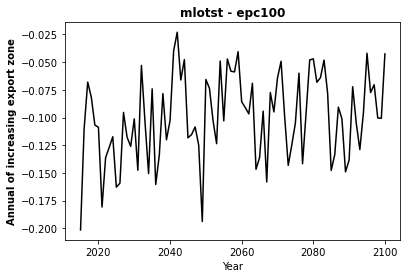

In [25]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc, 'k')
plt.title("{} - epc100".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_epc100_{}_annual_inc_correlation.png".format(model, variable, model))

plt.show()

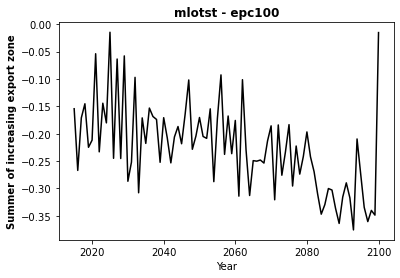

In [26]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc_summer, 'k')
plt.title("{} - epc100".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_epc100_{}_summer_inc_correlation.png".format(model, variable, model))

plt.show()

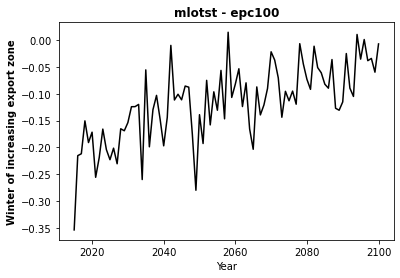

In [27]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc_winter, 'k')
plt.title("{} - epc100".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_epc100_{}_winter_inc_correlation.png".format(model, variable, model))

plt.show()

#### Decreasing zone


In [28]:
current_dec = xarray.open_dataarray("Data/{}_{}_{}_dec.nc".format(variable, model, experiment),decode_coords="all")
current_dec

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'mlotst' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    spatial_ref  int64 ...
Attributes:
    standard_name:       ocean_mixed_layer_thickness_defined_by_sigma_t
    long_name:           Ocean Mixed Layer Thickness Defined by Sigma T
    units:               m
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    description:         Sigma T is potential density referenced to ocean sur...
    history:             none

In [29]:
epc_dec = xarray.open_dataarray("Data/epc100_{}_{}_dec.nc".format(model, experiment), decode_coords="all")
epc_dec

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'epc100' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    depth        float64 ...
    spatial_ref  int64 ...
Attributes:
    standard_name:       sinking_mole_flux_of_particulate_organic_matter_expr...
    long_name:           Downward Flux of Particulate Organic Carbon
    units:               mol m-2 s-1
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    description:         The phrase 'expressed_as' is used in the constructio...
    history:             none

In [30]:
cor_dec = xarray.corr(current_dec, epc_dec, dim = ["lat", "lon"])
cor_dec = cor_dec.groupby("time.year").mean("time")
cor_dec

<xarray.DataArray (year: 86)>
array([-0.14597448, -0.10904329, -0.08792456, -0.16306482, -0.13040912,
       -0.0976439 , -0.15335845, -0.13804265, -0.04933993, -0.17191572,
       -0.15069173, -0.03808233, -0.01556146, -0.06845796, -0.09688172,
       -0.06060705, -0.08127451, -0.03706108, -0.07531102, -0.05805372,
       -0.02053284, -0.02004344, -0.05254925, -0.08251468, -0.08254927,
       -0.02304938, -0.0067299 , -0.068815  , -0.02283167, -0.01410698,
       -0.01294553, -0.05559312, -0.07327239, -0.0702901 , -0.01454687,
       -0.06205283, -0.0416868 , -0.06115873, -0.00606221,  0.0051545 ,
       -0.03417894, -0.0043556 , -0.0091502 , -0.00282464,  0.02761134,
        0.00783387,  0.02314457, -0.04244213, -0.02407012,  0.00507149,
       -0.06566669, -0.02796598, -0.03558807,  0.00154193, -0.0066172 ,
        0.05264459,  0.0132269 , -0.03711645,  0.0123655 ,  0.00778778,
        0.00176388,  0.02370397,  0.00939956,  0.00356416,  0.07084126,
        0.08824252, -0.0048044 , -0.03060251,  0.02750278,  0.0246212 ,
       -0.0603528 , -0.04850111, -0.00736483, -0.03903128, -0.04808482,
       -0.05112452, -0.01302026,  0.00975909,  0.00037049, -0.01198164,
        0.00952185,  0.04816093,  0.00167041, -0.03918268, -0.03262311,
        0.01866419])
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100

In [31]:
time = cor_dec["year"].values

In [32]:
current_dec_season = current_dec.resample(time='QS-DEC').mean(dim="time")
current_dec_season['time']

<xarray.DataArray 'time' (time: 345)>
array(['2014-12-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000', ..., '2100-06-01T00:00:00.000000000',
       '2100-09-01T00:00:00.000000000', '2100-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2014-12-01 2015-03-01 ... 2100-12-01
    spatial_ref  int64 0

In [33]:
current_dec_summer = current_dec_season.sel(time=(current_dec_season.time.dt.month == 12))
current_dec_summer = current_dec_summer.sel(time = slice("2015","2100"))

In [34]:
current_dec_winter = current_dec_season.sel(time=(current_dec_season.time.dt.month == 6))

In [35]:
epc_dec_season = epc_dec.resample(time='QS-DEC').mean(dim="time")

In [36]:
epc_dec_summer = epc_dec_season.sel(time=(epc_dec_season.time.dt.month == 12))
epc_dec_summer = epc_dec_summer.sel(time = slice("2015","2100"))
epc_dec_winter = epc_dec_season.sel(time=(epc_dec_season.time.dt.month == 6))

In [37]:
cor_dec_summer = xarray.corr(current_dec_summer, epc_dec_summer, dim = ["lat", "lon"])
cor_dec_summer

<xarray.DataArray (time: 86)>
array([-0.30791888, -0.28742712, -0.39285875, -0.34742874, -0.28135872,
       -0.34862662, -0.25162464, -0.25903969, -0.27649708, -0.24763213,
       -0.1904515 , -0.13534591, -0.18153535, -0.28272489, -0.26115185,
       -0.40205497, -0.17916201, -0.16458743, -0.26336579, -0.26000422,
       -0.15126587, -0.19447314, -0.37347519, -0.33419166, -0.20365809,
       -0.27506266, -0.31089844, -0.30331814, -0.31286752, -0.2906165 ,
       -0.21207396, -0.2127479 , -0.22681496, -0.28032146, -0.35168542,
       -0.29174067, -0.3304416 , -0.3169603 , -0.30245401, -0.26329366,
       -0.31923707, -0.34393408, -0.36538618, -0.2931533 , -0.3359455 ,
       -0.28865286, -0.30126427, -0.259935  , -0.33138   , -0.32190481,
       -0.25748898, -0.44820775, -0.26223158, -0.30012996, -0.3612854 ,
       -0.24355826, -0.39163822, -0.28382795, -0.25937202, -0.27722986,
       -0.30923691, -0.25277748, -0.29532677, -0.32816439, -0.20870168,
       -0.29773246, -0.35100746, -0.29450332, -0.38110165, -0.46012805,
       -0.37476588, -0.39626355, -0.3323178 , -0.34698441, -0.42348801,
       -0.39231199, -0.38267518, -0.39313794, -0.39768868, -0.34705766,
       -0.32902118, -0.29277012, -0.38753955, -0.45738974, -0.37391041,
       -0.15990862])
Coordinates:
  * time         (time) datetime64[ns] 2015-12-01 2016-12-01 ... 2100-12-01
    spatial_ref  int64 0
    depth        float64 100.0

In [38]:
cor_dec_winter = xarray.corr(current_dec_winter, epc_dec_winter, dim = ["lat", "lon"])
cor_dec_winter

<xarray.DataArray (time: 86)>
array([-0.10724174, -0.08700004, -0.13849822, -0.14930487, -0.14075092,
       -0.03997902, -0.18346481, -0.13352957, -0.11339257, -0.20790796,
       -0.18294964,  0.03750862, -0.01471697,  0.00210811, -0.10202883,
        0.11144679,  0.10342456,  0.13341453, -0.0698073 , -0.08330876,
        0.17196512,  0.13181216,  0.03845322,  0.02081193,  0.07574421,
        0.09317757,  0.18435285,  0.01614653,  0.11964374,  0.17105845,
        0.13535085,  0.06371649,  0.00429799,  0.07980602,  0.11306394,
        0.04295232, -0.00866033,  0.05986727,  0.1604642 ,  0.19123916,
        0.01567635,  0.09623388,  0.27880452,  0.13943146,  0.1200894 ,
        0.20416835,  0.19226316,  0.04379332,  0.14037146,  0.18140076,
        0.06696694,  0.12452462,  0.18219201,  0.16803194,  0.13105496,
        0.25536219,  0.16974116,  0.11747344,  0.13439249,  0.13100224,
        0.18118248,  0.17954857,  0.14963565,  0.17856448,  0.28391801,
        0.28925393,  0.12325489,  0.14258343,  0.12457895,  0.19948656,
        0.13730322,  0.11389956,  0.18756878,  0.09423836,  0.09933412,
        0.06001975,  0.14792257,  0.18387747,  0.19828529,  0.21514209,
        0.17577356,  0.27304494,  0.18126671,  0.17018688,  0.17965337,
        0.2279727 ])
Coordinates:
  * time         (time) datetime64[ns] 2015-06-01 2016-06-01 ... 2100-06-01
    spatial_ref  int64 0
    depth        float64 100.0

In [39]:
data = {'Year': time,
        'Annual': cor_dec,
        'Summer': cor_dec_summer,
        'Winter': cor_dec_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,-0.145974,-0.307919,-0.107242,IPSL-CM6A-LR
1,2016,-0.109043,-0.287427,-0.087000,IPSL-CM6A-LR
2,2017,-0.087925,-0.392859,-0.138498,IPSL-CM6A-LR
3,2018,-0.163065,-0.347429,-0.149305,IPSL-CM6A-LR
4,2019,-0.130409,-0.281359,-0.140751,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,0.048161,-0.292770,0.273045,IPSL-CM6A-LR
82,2097,0.001670,-0.387540,0.181267,IPSL-CM6A-LR
83,2098,-0.039183,-0.457390,0.170187,IPSL-CM6A-LR
84,2099,-0.032623,-0.373910,0.179653,IPSL-CM6A-LR


In [40]:
df.to_csv("csv/{}_{}_epc100_correlation_dec.csv".format(model, variable), index = False, header=True)

In [38]:
dec_mean = np.nanmean(cor_dec.values)
dec_mean_summer = np.nanmean(cor_dec_summer.values)
dec_mean_winter = np.nanmean(cor_dec_winter.values)

dec_max = np.nanmax(cor_dec.values)
dec_max_summer = np.nanmax(cor_dec_summer.values)
dec_max_winter = np.nanmax(cor_dec_winter.values)

dec_min = np.nanmin(cor_dec.values)
dec_min_summer = np.nanmin(cor_dec_summer.values)
dec_min_winter = np.nanmin(cor_dec_winter.values)

In [39]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nSpatial correlation with epc100 in decreasing zone:\n")
summary.write("Annual mean: {}\nAnnual max: {}\nAnnual min: {}".format(dec_mean, dec_max, dec_min))
summary.write("\n\nSummer mean: {}\nSummer max: {}\nSummer min: {}".format(dec_mean_summer, dec_max_summer, dec_min_summer))
summary.write("\n\nWinter mean: {}\nWinter max: {}\nWinter min: {}".format(dec_mean_winter, dec_max_winter, dec_min_winter))
summary.close()

#### Plotting

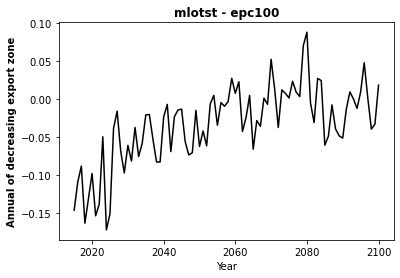

In [41]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec, 'k')
plt.title("{} - epc100".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_epc100_{}_annual_dec_correlation.png".format(model, variable, model))

plt.show()

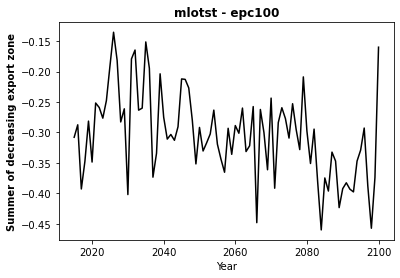

In [42]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec_summer, 'k')
plt.title("{} - epc100".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_epc100_{}_summer_dec_correlation.png".format(model, variable, model))

plt.show()

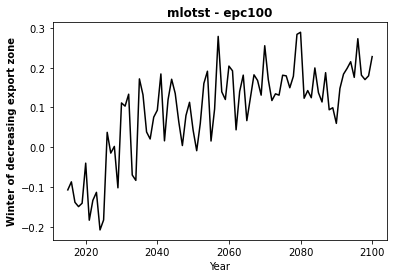

In [43]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec_winter, 'k')
plt.title("{} - epc100".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_epc100_{}_winter_dec_correlation.png".format(model, variable, model))

plt.show()

# Correlation with intpp

### 20 year change correlation

#### Percentage

In [6]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
other_inc_per = xarray.open_dataarray("Data/intpp_{}_{}_percentage.nc".format(model, experiment))

In [7]:
cor_per = xarray.corr(current_inc_per, other_inc_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(-0.20428125)

In [8]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nPercentage correlation with intpp: {}".format(cor_per.values))
summary.close()

#### Absolute

In [9]:
current_inc_abs = xarray.open_dataarray("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))
other_inc_abs = xarray.open_dataarray("Data/intpp_{}_{}_absolute.nc".format(model, experiment))

In [10]:
cor_abs = xarray.corr(current_inc_abs, other_inc_abs, dim = ["lat", "lon"])
cor_abs

<xarray.DataArray ()>
array(-0.03828642)

In [11]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\nAbsolute correlation with intpp: {}".format(cor_abs.values))
summary.close()

### Spatial correlation 

#### Increasing zone


In [12]:
current_inc = xarray.open_dataarray("Data/{}_{}_{}_inc.nc".format(variable, model, experiment),decode_coords="all")
current_inc

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'mlotst' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    spatial_ref  int64 ...
Attributes:
    standard_name:       ocean_mixed_layer_thickness_defined_by_sigma_t
    long_name:           Ocean Mixed Layer Thickness Defined by Sigma T
    units:               m
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    description:         Sigma T is potential density referenced to ocean sur...
    history:             none

In [13]:
epc = xarray.open_dataarray("Data/intpp_{}_{}_inc.nc".format(model, experiment), decode_coords="all")
epc

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'intpp' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    spatial_ref  int64 ...
Attributes:
    standard_name:       net_primary_mole_productivity_of_biomass_expressed_a...
    long_name:           Primary Organic Carbon Production by All Types of Ph...
    units:               mol m-2 s-1
    online_operation:    average
    cell_methods:        area: mean where sea depth: sum where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    description:         Vertically integrated total primary (organic carbon)...
    history:             none

In [14]:
cor_inc = xarray.corr(current_inc, epc, dim = ["lat", "lon"])
cor_inc = cor_inc.groupby("time.year").mean("time")
cor_inc

<xarray.DataArray (year: 86)>
array([-0.14722647, -0.09599523, -0.08458755, -0.11128192, -0.09678574,
       -0.1285834 , -0.12579132, -0.13316523, -0.12905324, -0.09428993,
       -0.15920577, -0.15169327, -0.06478689, -0.11784256, -0.11785149,
       -0.08904573, -0.14125706, -0.03622264, -0.10596028, -0.10399485,
       -0.11331081, -0.15707992, -0.16505466, -0.09992782, -0.14972373,
       -0.09604293, -0.02819084, -0.06680097, -0.06175611, -0.07562677,
       -0.13191843, -0.14355891, -0.12289947, -0.13755099, -0.15439481,
       -0.05542773, -0.04279895, -0.1283715 , -0.10463791, -0.06310348,
       -0.10224903, -0.0915718 , -0.08764245, -0.1065987 , -0.06908951,
       -0.06866896, -0.10659343, -0.10095031, -0.11541277, -0.12504608,
       -0.10133029, -0.07052264, -0.14054961, -0.10722082, -0.12640053,
       -0.09488731, -0.11251245, -0.11890529, -0.12718011, -0.14409929,
       -0.11206386, -0.07060661, -0.12198229, -0.13551152, -0.09955043,
       -0.04964659, -0.09089932, -0.10793452, -0.10567267, -0.10547185,
       -0.14772574, -0.15882134, -0.12538092, -0.10421158, -0.13586218,
       -0.11034668, -0.08942666, -0.09927238, -0.13151367, -0.11346352,
       -0.08540438, -0.11874371, -0.0916139 , -0.12406235, -0.10421205,
       -0.07548836])
Coordinates:
    spatial_ref  int64 0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100

In [15]:
time = cor_inc["year"].values

In [16]:
current_inc_season = current_inc.resample(time='QS-DEC').mean(dim="time")
current_inc_season['time']

<xarray.DataArray 'time' (time: 345)>
array(['2014-12-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000', ..., '2100-06-01T00:00:00.000000000',
       '2100-09-01T00:00:00.000000000', '2100-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2014-12-01 2015-03-01 ... 2100-12-01
    spatial_ref  int64 0

In [17]:
current_inc_summer = current_inc_season.sel(time=(current_inc_season.time.dt.month == 12))
current_inc_summer = current_inc_summer.sel(time = slice("2015","2100"))

In [18]:
current_inc_winter = current_inc_season.sel(time=(current_inc_season.time.dt.month == 6))

In [19]:
epc_inc_season = epc.resample(time='QS-DEC').mean(dim="time")

In [20]:
epc_inc_summer = epc_inc_season.sel(time=(epc_inc_season.time.dt.month == 12))
epc_inc_summer = epc_inc_summer.sel(time = slice("2015","2100"))
epc_inc_winter = epc_inc_season.sel(time=(epc_inc_season.time.dt.month == 6))

In [21]:
cor_inc_summer = xarray.corr(current_inc_summer, epc_inc_summer, dim = ["lat", "lon"])
cor_inc_summer

<xarray.DataArray (time: 86)>
array([-0.1754068 , -0.29233797, -0.17776866, -0.17091282, -0.24238051,
       -0.26744243, -0.04918442, -0.25109618, -0.16859986, -0.18088299,
       -0.01251235, -0.31347129, -0.06774847, -0.26586242, -0.08479696,
       -0.30332076, -0.27621595, -0.10142052, -0.33958155, -0.17585188,
       -0.27167779, -0.173989  , -0.15209712, -0.18694657, -0.28300104,
       -0.20011717, -0.2226089 , -0.2609163 , -0.22792874, -0.2051139 ,
       -0.23047608, -0.15871207, -0.10725907, -0.26248724, -0.17211002,
       -0.14710108, -0.18035296, -0.24892348, -0.16774831, -0.30759242,
       -0.15782547, -0.07110944, -0.230467  , -0.14307868, -0.23569933,
       -0.13948519, -0.35645505, -0.11945651, -0.22739562, -0.33381872,
       -0.26055505, -0.21977468, -0.26127603, -0.24089038, -0.18236561,
       -0.16116444, -0.29651647, -0.16848825, -0.25724286, -0.2234815 ,
       -0.16882509, -0.30138008, -0.18595659, -0.24586866, -0.26368295,
       -0.18959769, -0.20192361, -0.26727865, -0.28064669, -0.31722823,
       -0.32029623, -0.25564242, -0.25599927, -0.30265729, -0.30763087,
       -0.30111815, -0.23924488, -0.27442114, -0.31840056, -0.17168653,
       -0.23823977, -0.27136853, -0.31861614, -0.26862937, -0.29576904,
       -0.29188503])
Coordinates:
  * time         (time) datetime64[ns] 2015-12-01 2016-12-01 ... 2100-12-01
    spatial_ref  int64 0

In [22]:
cor_inc_winter = xarray.corr(current_inc_winter, epc_inc_winter, dim = ["lat", "lon"])
cor_inc_winter

<xarray.DataArray (time: 86)>
array([-0.20806151, -0.14550534, -0.13598775, -0.17876342, -0.14615161,
       -0.18168614, -0.15291273, -0.1780129 , -0.16499426, -0.13862852,
       -0.22741926, -0.17611751, -0.16233674, -0.17721585, -0.13463793,
       -0.11911874, -0.13131792, -0.07875726, -0.14208886, -0.16740135,
       -0.12383931, -0.16970897, -0.19937226, -0.19812252, -0.20299733,
       -0.17661164, -0.10707183, -0.12635285, -0.11582539, -0.13738825,
       -0.16325011, -0.17561795, -0.17339897, -0.21119492, -0.21499449,
       -0.13094766, -0.12258573, -0.16122435, -0.16156508, -0.14375872,
       -0.15653221, -0.13742526, -0.18455245, -0.13570498, -0.16797114,
       -0.12592713, -0.14013712, -0.1261803 , -0.21354494, -0.16844361,
       -0.16681952, -0.14345916, -0.15154383, -0.16029536, -0.18381926,
       -0.09284277, -0.19016103, -0.1805953 , -0.17622069, -0.19630675,
       -0.20162048, -0.14223955, -0.15819059, -0.15948091, -0.14357371,
       -0.12037988, -0.16081286, -0.1402593 , -0.19070796, -0.14588244,
       -0.16571482, -0.19911113, -0.1466    , -0.19091984, -0.19203251,
       -0.17283732, -0.09779793, -0.17127837, -0.18394876, -0.14313637,
       -0.1782627 , -0.13789392, -0.13675652, -0.17995286, -0.14487419,
       -0.12863063])
Coordinates:
  * time         (time) datetime64[ns] 2015-06-01 2016-06-01 ... 2100-06-01
    spatial_ref  int64 0

In [23]:
data = {'Year': time,
        'Annual': cor_inc,
        'Summer': cor_inc_summer,
        'Winter': cor_inc_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,-0.147226,-0.175407,-0.208062,IPSL-CM6A-LR
1,2016,-0.095995,-0.292338,-0.145505,IPSL-CM6A-LR
2,2017,-0.084588,-0.177769,-0.135988,IPSL-CM6A-LR
3,2018,-0.111282,-0.170913,-0.178763,IPSL-CM6A-LR
4,2019,-0.096786,-0.242381,-0.146152,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,-0.118744,-0.271369,-0.137894,IPSL-CM6A-LR
82,2097,-0.091614,-0.318616,-0.136757,IPSL-CM6A-LR
83,2098,-0.124062,-0.268629,-0.179953,IPSL-CM6A-LR
84,2099,-0.104212,-0.295769,-0.144874,IPSL-CM6A-LR


In [24]:
df.to_csv("csv/{}_{}_intpp_correlation_inc.csv".format(model, variable), index = False, header=True)

In [69]:
inc_mean = np.nanmean(cor_inc.values)
inc_mean_summer = np.nanmean(cor_inc_summer.values)
inc_mean_winter = np.nanmean(cor_inc_winter.values)

inc_max = np.nanmax(cor_inc.values)
inc_max_summer = np.nanmax(cor_inc_summer.values)
inc_max_winter = np.nanmax(cor_inc_winter.values)

inc_min = np.nanmin(cor_inc.values)
inc_min_summer = np.nanmin(cor_inc_summer.values)
inc_min_winter = np.nanmin(cor_inc_winter.values)

In [70]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nSpatial correlation with intpp in increasing zone:\n")
summary.write("Annual mean: {}\nAnnual max: {}\nAnnual min: {}".format(inc_mean, inc_max, inc_min))
summary.write("\n\nSummer mean: {}\nSummer max: {}\nSummer min: {}".format(inc_mean_summer, inc_max_summer, inc_min_summer))
summary.write("\n\nWinter mean: {}\nWinter max: {}\nWinter min: {}".format(inc_mean_winter, inc_max_winter, inc_min_winter))
summary.close()

#### Plotting

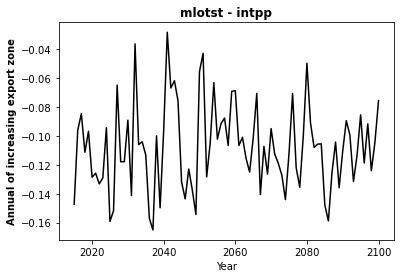

In [25]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc, 'k')
plt.title("{} - intpp".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_intpp_{}_annual_inc_correlation.png".format(model, variable, model))

plt.show()

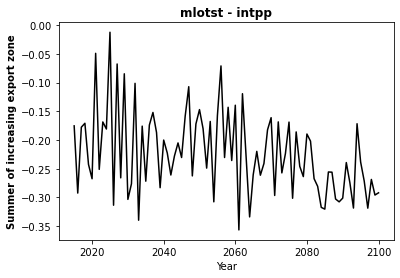

In [26]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc_summer, 'k')
plt.title("{} - intpp".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_intpp_{}_summer_inc_correlation.png".format(model, variable, model))

plt.show()

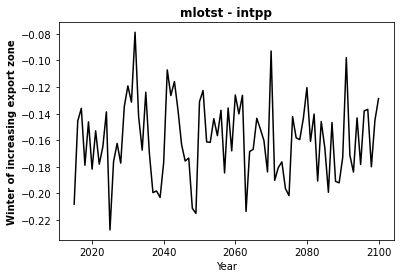

In [27]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc_winter, 'k')
plt.title("{} - intpp".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_intpp_{}_winter_inc_correlation.png".format(model, variable, model))

plt.show()

#### Decreasing zone


In [28]:
current_dec = xarray.open_dataarray("Data/{}_{}_{}_dec.nc".format(variable, model, experiment),decode_coords="all")
current_dec

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'mlotst' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    spatial_ref  int64 ...
Attributes:
    standard_name:       ocean_mixed_layer_thickness_defined_by_sigma_t
    long_name:           Ocean Mixed Layer Thickness Defined by Sigma T
    units:               m
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    description:         Sigma T is potential density referenced to ocean sur...
    history:             none

In [29]:
epc_dec = xarray.open_dataarray("Data/intpp_{}_{}_dec.nc".format(model, experiment), decode_coords="all")
epc_dec

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'intpp' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    spatial_ref  int64 ...
Attributes:
    standard_name:       net_primary_mole_productivity_of_biomass_expressed_a...
    long_name:           Primary Organic Carbon Production by All Types of Ph...
    units:               mol m-2 s-1
    online_operation:    average
    cell_methods:        area: mean where sea depth: sum where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    description:         Vertically integrated total primary (organic carbon)...
    history:             none

In [30]:
cor_dec = xarray.corr(current_dec, epc_dec, dim = ["lat", "lon"])
cor_dec = cor_dec.groupby("time.year").mean("time")
cor_dec

<xarray.DataArray (year: 86)>
array([-0.06835556, -0.03422662, -0.06742933, -0.09708413, -0.06946953,
       -0.03005068, -0.06813098, -0.06454533, -0.02366467, -0.09261737,
       -0.10075585,  0.01549254,  0.06845184, -0.00267332, -0.04320214,
        0.00388378,  0.02954474,  0.05100781, -0.01769908,  0.02320137,
        0.06314025,  0.01821376, -0.02459394, -0.02287573, -0.02318112,
        0.05862728,  0.09192202, -0.00877262,  0.03902764,  0.0461336 ,
        0.04792179, -0.02317882, -0.03003253, -0.00272292,  0.08032056,
        0.03000833,  0.05946266,  0.01160927,  0.07071407,  0.08013493,
        0.01294969,  0.03530861,  0.06586196,  0.06287484,  0.08598523,
        0.12541399,  0.11130315,  0.01151761,  0.04993108,  0.12493266,
        0.03751296,  0.04241972,  0.07632738,  0.0785218 ,  0.06215721,
        0.11713693,  0.06006694,  0.05248345,  0.11431191,  0.07488896,
        0.09099842,  0.097419  ,  0.10974672,  0.04749775,  0.13280121,
        0.18304612,  0.0698853 ,  0.0360528 ,  0.07588479,  0.08843037,
        0.01285092,  0.00738043,  0.04671282,  0.05345082,  0.05037398,
        0.02842819,  0.07198038,  0.10158832,  0.10873796,  0.0522704 ,
        0.07678448,  0.09997375,  0.06570522,  0.02611078,  0.06003249,
        0.10140863])
Coordinates:
    spatial_ref  int64 0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100

In [31]:
time = cor_dec["year"].values

In [32]:
current_dec_season = current_dec.resample(time='QS-DEC').mean(dim="time")
current_dec_season['time']

<xarray.DataArray 'time' (time: 345)>
array(['2014-12-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000', ..., '2100-06-01T00:00:00.000000000',
       '2100-09-01T00:00:00.000000000', '2100-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2014-12-01 2015-03-01 ... 2100-12-01
    spatial_ref  int64 0

In [33]:
current_dec_summer = current_dec_season.sel(time=(current_dec_season.time.dt.month == 12))
current_dec_summer = current_dec_summer.sel(time = slice("2015","2100"))

In [34]:
current_dec_winter = current_dec_season.sel(time=(current_dec_season.time.dt.month == 6))

In [35]:
epc_dec_season = epc_dec.resample(time='QS-DEC').mean(dim="time")

In [36]:
epc_dec_summer = epc_dec_season.sel(time=(epc_dec_season.time.dt.month == 12))
epc_dec_summer = epc_dec_summer.sel(time = slice("2015","2100"))
epc_dec_winter = epc_dec_season.sel(time=(epc_dec_season.time.dt.month == 6))

In [37]:
cor_dec_summer = xarray.corr(current_dec_summer, epc_dec_summer, dim = ["lat", "lon"])
cor_dec_summer

<xarray.DataArray (time: 86)>
array([-0.25897598, -0.24355034, -0.39853802, -0.31580141, -0.23661507,
       -0.33459493, -0.18518405, -0.21399416, -0.26864083, -0.22549431,
       -0.14093832, -0.12568054, -0.10744223, -0.26471238, -0.22889713,
       -0.36858248, -0.14349145, -0.09473347, -0.24097438, -0.22771633,
       -0.11900813, -0.17271043, -0.36384022, -0.31695126, -0.21092629,
       -0.24124681, -0.26165644, -0.23990413, -0.28236175, -0.25581515,
       -0.17003876, -0.17956539, -0.21916088, -0.23071163, -0.3324841 ,
       -0.268316  , -0.27695917, -0.26383864, -0.26520141, -0.25243205,
       -0.26771343, -0.29850548, -0.30498361, -0.25494728, -0.2783818 ,
       -0.20600114, -0.26501352, -0.20291081, -0.26562091, -0.30312489,
       -0.23343056, -0.38596096, -0.21693581, -0.19969382, -0.33215902,
       -0.15607742, -0.35889031, -0.22171193, -0.19555887, -0.20729593,
       -0.27588925, -0.15679031, -0.21112254, -0.27752901, -0.138176  ,
       -0.24450351, -0.26709685, -0.24922143, -0.33955601, -0.40136879,
       -0.33203061, -0.32836706, -0.25351766, -0.28681513, -0.34683201,
       -0.31889361, -0.25275581, -0.30638429, -0.31116115, -0.27448896,
       -0.26334464, -0.22933884, -0.314915  , -0.31468693, -0.30427079,
       -0.42909742])
Coordinates:
  * time         (time) datetime64[ns] 2015-12-01 2016-12-01 ... 2100-12-01
    spatial_ref  int64 0

In [38]:
cor_dec_winter = xarray.corr(current_dec_winter, epc_dec_winter, dim = ["lat", "lon"])
cor_dec_winter

<xarray.DataArray (time: 86)>
array([-0.07881978, -0.05418126, -0.10257395, -0.11869549, -0.09393489,
       -0.01879763, -0.13814934, -0.10887037, -0.07869676, -0.14295488,
       -0.15063068,  0.04120539,  0.0109661 ,  0.00184164, -0.08944387,
        0.13711621,  0.16111038,  0.1619561 , -0.06043771, -0.07864757,
        0.1931185 ,  0.11476828, -0.00380988,  0.00113833,  0.0605543 ,
        0.11357363,  0.20455088,  0.01618423,  0.14023199,  0.15691889,
        0.13227475,  0.0352108 , -0.02506651,  0.08326471,  0.11540439,
        0.06775103,  0.03643375,  0.04169285,  0.14864468,  0.17376529,
        0.0142473 ,  0.075797  ,  0.25157191,  0.11592626,  0.13207141,
        0.26767844,  0.18436777,  0.04464589,  0.0995719 ,  0.21538913,
        0.09338107,  0.09094841,  0.24994011,  0.16058658,  0.11121169,
        0.30170737,  0.12353353,  0.11515622,  0.14949149,  0.09637213,
        0.13489162,  0.16275313,  0.17923149,  0.09942988,  0.28060506,
        0.32946234,  0.13260682,  0.10946891,  0.11540106,  0.19374225,
        0.14750087,  0.07763278,  0.13301111,  0.07910266,  0.09847781,
        0.04609831,  0.1497909 ,  0.16304921,  0.22517259,  0.18326475,
        0.13711588,  0.22332512,  0.16938402,  0.09929567,  0.13956082,
        0.22000453])
Coordinates:
  * time         (time) datetime64[ns] 2015-06-01 2016-06-01 ... 2100-06-01
    spatial_ref  int64 0

In [39]:
data = {'Year': time,
        'Annual': cor_dec,
        'Summer': cor_dec_summer,
        'Winter': cor_dec_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,-0.068356,-0.258976,-0.078820,IPSL-CM6A-LR
1,2016,-0.034227,-0.243550,-0.054181,IPSL-CM6A-LR
2,2017,-0.067429,-0.398538,-0.102574,IPSL-CM6A-LR
3,2018,-0.097084,-0.315801,-0.118695,IPSL-CM6A-LR
4,2019,-0.069470,-0.236615,-0.093935,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,0.099974,-0.229339,0.223325,IPSL-CM6A-LR
82,2097,0.065705,-0.314915,0.169384,IPSL-CM6A-LR
83,2098,0.026111,-0.314687,0.099296,IPSL-CM6A-LR
84,2099,0.060032,-0.304271,0.139561,IPSL-CM6A-LR


In [40]:
df.to_csv("csv/{}_{}_intpp_correlation_dec.csv".format(model, variable), index = False, header=True)

In [130]:
dec_mean = np.nanmean(cor_dec.values)
dec_mean_summer = np.nanmean(cor_dec_summer.values)
dec_mean_winter = np.nanmean(cor_dec_winter.values)

dec_max = np.nanmax(cor_dec.values)
dec_max_summer = np.nanmax(cor_dec_summer.values)
dec_max_winter = np.nanmax(cor_dec_winter.values)

dec_min = np.nanmin(cor_dec.values)
dec_min_summer = np.nanmin(cor_dec_summer.values)
dec_min_winter = np.nanmin(cor_dec_winter.values)

In [131]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nSpatial correlation with intpp in decreasing zone:\n")
summary.write("Annual mean: {}\nAnnual max: {}\nAnnual min: {}".format(dec_mean, dec_max, dec_min))
summary.write("\n\nSummer mean: {}\nSummer max: {}\nSummer min: {}".format(dec_mean_summer, dec_max_summer, dec_min_summer))
summary.write("\n\nWinter mean: {}\nWinter max: {}\nWinter min: {}".format(dec_mean_winter, dec_max_winter, dec_min_winter))
summary.close()

#### Plotting

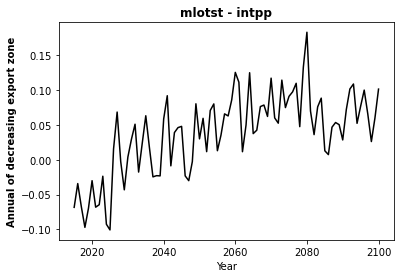

In [41]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec, 'k')
plt.title("{} - intpp".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_intpp_{}_annual_dec_correlation.png".format(model, variable, model))

plt.show()

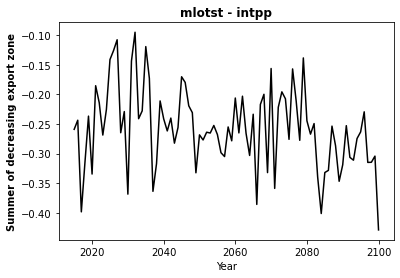

In [42]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec_summer, 'k')
plt.title("{} - intpp".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_intpp_{}_summer_dec_correlation.png".format(model, variable, model))

plt.show()

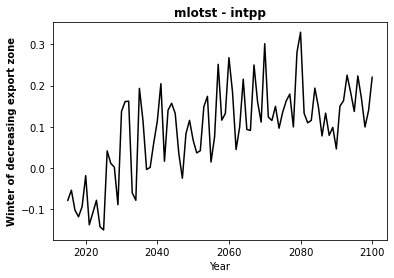

In [43]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec_winter, 'k')
plt.title("{} - intpp".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_intpp_{}_winter_dec_correlation.png".format(model, variable, model))

plt.show()

## Correlation with siconc

### 20 year change correlation

#### Percentage

In [6]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
other_inc_per = xarray.open_dataarray("Data/siconc_{}_{}_percentage.nc".format(model, experiment))

In [7]:
cor_per = xarray.corr(current_inc_per, other_inc_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(-0.5966059)

In [8]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nPercentage correlation with siconc: {}".format(cor_per.values))
summary.close()

#### Absolute

In [9]:
current_inc_abs = xarray.open_dataarray("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))
other_inc_abs = xarray.open_dataarray("Data/siconc_{}_{}_absolute.nc".format(model, experiment))

In [10]:
cor_abs = xarray.corr(current_inc_abs, other_inc_abs, dim = ["lat", "lon"])
cor_abs

<xarray.DataArray ()>
array(0.0837822)

In [11]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\nAbsolute correlation with siconc: {}".format(cor_abs.values))
summary.close()

### Spatial correlation 

#### Increasing zone


In [12]:
current_inc = xarray.open_dataarray("Data/{}_{}_{}_inc.nc".format(variable, model, experiment),decode_coords="all")
current_inc

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'mlotst' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    spatial_ref  int64 ...
Attributes:
    standard_name:       ocean_mixed_layer_thickness_defined_by_sigma_t
    long_name:           Ocean Mixed Layer Thickness Defined by Sigma T
    units:               m
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    description:         Sigma T is potential density referenced to ocean sur...
    history:             none

In [13]:
epc = xarray.open_dataarray("Data/siconc_{}_{}_inc.nc".format(model, experiment), decode_coords="all")
epc

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'siconc' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    spatial_ref  int64 ...
Attributes:
    standard_name:       sea_ice_area_fraction
    long_name:           Sea Ice Area Fraction (Ocean Grid)
    units:               %
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    description:         Area fraction of grid cell covered by sea ice
    history:             none

In [14]:
cor_inc = xarray.corr(current_inc, epc, dim = ["lat", "lon"])
cor_inc = cor_inc.groupby("time.year").mean("time")
cor_inc

<xarray.DataArray (year: 86)>
array([ 0.11395374,  0.03651244,  0.00542487,  0.01267991,  0.05360764,
        0.02954044,  0.08244695,  0.05568353,  0.03630769,  0.02560459,
        0.04622732,  0.09221139,  0.05294142,  0.02721759,  0.03359758,
        0.01258665,  0.09480387, -0.07082057, -0.01945653,  0.02580726,
       -0.014758  ,  0.12016307,  0.10908854,  0.00739394,  0.07441875,
        0.05671025, -0.01890266, -0.04317781, -0.06350527,  0.02703957,
        0.04294802,  0.06579129,  0.03404248,  0.07068023,  0.12590773,
       -0.05333588, -0.04987132,  0.02769437,  0.06894722, -0.03512225,
        0.04648849,  0.02952851,  0.02273409,  0.02259767,  0.01261004,
       -0.06900736,  0.02035413,  0.07708441,  0.03315371,  0.0766918 ,
        0.01823432, -0.00032625,  0.08415489,  0.0443192 ,  0.03074758,
       -0.01043387,  0.00335526,  0.02762334,  0.05645628,  0.05973575,
        0.05291703,  0.03023584,  0.04964462,  0.06813391,  0.03626027,
        0.06380194,  0.0167202 ,  0.03413097,  0.04855483,  0.01229755,
        0.05288769,  0.07860432,  0.05778415,  0.0313548 ,  0.03704339,
        0.04128868,  0.02602116,  0.02363433,  0.04127152, -0.00138197,
        0.01078684,  0.04299914,  0.04088937,  0.11891986,  0.04692352,
        0.02404941])
Coordinates:
    spatial_ref  int64 0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100

In [15]:
time = cor_inc["year"].values

In [16]:
current_inc_season = current_inc.resample(time='QS-DEC').mean(dim="time")
current_inc_season['time']

<xarray.DataArray 'time' (time: 345)>
array(['2014-12-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000', ..., '2100-06-01T00:00:00.000000000',
       '2100-09-01T00:00:00.000000000', '2100-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2014-12-01 2015-03-01 ... 2100-12-01
    spatial_ref  int64 0

In [17]:
current_inc_summer = current_inc_season.sel(time=(current_inc_season.time.dt.month == 12))
current_inc_summer = current_inc_summer.sel(time = slice("2015","2100"))

In [18]:
current_inc_winter = current_inc_season.sel(time=(current_inc_season.time.dt.month == 6))

In [19]:
epc_inc_season = epc.resample(time='QS-DEC').mean(dim="time")

In [20]:
epc_inc_summer = epc_inc_season.sel(time=(epc_inc_season.time.dt.month == 12))
epc_inc_summer = epc_inc_summer.sel(time = slice("2015","2100"))
epc_inc_winter = epc_inc_season.sel(time=(epc_inc_season.time.dt.month == 6))

In [21]:
cor_inc_summer = xarray.corr(current_inc_summer, epc_inc_summer, dim = ["lat", "lon"])
cor_inc_summer

<xarray.DataArray (time: 86)>
array([-0.06729076,  0.03941429, -0.40872088,  0.06292928,  0.01691796,
        0.08621155, -0.28851418, -0.06547918, -0.14092554, -0.31184858,
       -0.32495126,  0.25321154, -0.31243517,  0.04069668, -0.20494058,
        0.08501514,  0.16334179, -0.27352666,  0.13381781, -0.29652252,
        0.07698297, -0.06305981, -0.31479551, -0.26338635,  0.14183623,
        0.02201385, -0.10820461, -0.11258921, -0.01391907, -0.2458771 ,
       -0.08337583, -0.21275817, -0.23829125,  0.18947721, -0.31430593,
       -0.33310416, -0.50754416,  0.04679742, -0.13857275,  0.02254418,
       -0.28818786, -0.28519166, -0.26815538, -0.27661336, -0.3701293 ,
       -0.49787718,  0.25028306, -0.42617822,  0.01648901, -0.05463063,
        0.06290894, -0.37019045,  0.10401197, -0.35814043, -0.3976395 ,
       -0.44582129, -0.55693625, -0.33493897, -0.27946536, -0.16698086,
       -0.23670112,  0.12483498, -0.43094151, -0.33637723, -0.0481661 ,
       -0.17482856, -0.40076978, -0.13562132, -0.39551348, -0.46681896,
       -0.30787122, -0.45278655, -0.19543543, -0.27345871, -0.30987061,
       -0.04866494, -0.22791561, -0.44962189, -0.48154356, -0.43762112,
       -0.43408729, -0.36096966, -0.44471456, -0.24300589, -0.45050117,
       -0.45687188])
Coordinates:
  * time         (time) datetime64[ns] 2015-12-01 2016-12-01 ... 2100-12-01
    spatial_ref  int64 0

In [22]:
cor_inc_winter = xarray.corr(current_inc_winter, epc_inc_winter, dim = ["lat", "lon"])
cor_inc_winter

<xarray.DataArray (time: 86)>
array([0.2903407 , 0.22758958, 0.19282963, 0.21976022, 0.20041501,
       0.14717027, 0.25166921, 0.25397164, 0.20967529, 0.22103674,
       0.28862334, 0.23924247, 0.28992036, 0.23128331, 0.18813479,
       0.16205337, 0.16506178, 0.07376517, 0.1135234 , 0.24930896,
       0.06428179, 0.26631375, 0.29982234, 0.25886832, 0.3025355 ,
       0.24477641, 0.2050953 , 0.14331563, 0.09750714, 0.2279462 ,
       0.20514429, 0.2191881 , 0.22611987, 0.33571168, 0.3062433 ,
       0.15708948, 0.19596717, 0.22761649, 0.27347839, 0.18559179,
       0.24389671, 0.24207735, 0.33144112, 0.18416613, 0.22836227,
       0.15164758, 0.22071239, 0.23068598, 0.22969012, 0.25497798,
       0.25605004, 0.21762561, 0.25278338, 0.26641949, 0.28223053,
       0.17268949, 0.33359962, 0.28463852, 0.27843499, 0.30545178,
       0.30362985, 0.25797026, 0.23793151, 0.26087006, 0.27080421,
       0.28644486, 0.30099293, 0.22032212, 0.28677522, 0.21089965,
       0.24776454, 0.35047863, 0.26425203, 0.30805077, 0.27184765,
       0.24306545, 0.18587484, 0.29515625, 0.27599099, 0.23888227,
       0.32753734, 0.27277089, 0.28694486, 0.34672553, 0.32040631,
       0.27899504])
Coordinates:
  * time         (time) datetime64[ns] 2015-06-01 2016-06-01 ... 2100-06-01
    spatial_ref  int64 0

In [23]:
data = {'Year': time,
        'Annual': cor_inc,
        'Summer': cor_inc_summer,
        'Winter': cor_inc_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,0.113954,-0.067291,0.290341,IPSL-CM6A-LR
1,2016,0.036512,0.039414,0.227590,IPSL-CM6A-LR
2,2017,0.005425,-0.408721,0.192830,IPSL-CM6A-LR
3,2018,0.012680,0.062929,0.219760,IPSL-CM6A-LR
4,2019,0.053608,0.016918,0.200415,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,0.042999,-0.360970,0.272771,IPSL-CM6A-LR
82,2097,0.040889,-0.444715,0.286945,IPSL-CM6A-LR
83,2098,0.118920,-0.243006,0.346726,IPSL-CM6A-LR
84,2099,0.046924,-0.450501,0.320406,IPSL-CM6A-LR


In [24]:
df.to_csv("csv/{}_{}_siconc_correlation_inc.csv".format(model, variable), index = False, header=True)

In [25]:
inc_mean = np.nanmean(cor_inc.values)
inc_mean_summer = np.nanmean(cor_inc_summer.values)
inc_mean_winter = np.nanmean(cor_inc_winter.values)

inc_max = np.nanmax(cor_inc.values)
inc_max_summer = np.nanmax(cor_inc_summer.values)
inc_max_winter = np.nanmax(cor_inc_winter.values)

inc_min = np.nanmin(cor_inc.values)
inc_min_summer = np.nanmin(cor_inc_summer.values)
inc_min_winter = np.nanmin(cor_inc_winter.values)

In [26]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nSpatial correlation with siconc in increasing zone:\n")
summary.write("Annual mean: {}\nAnnual max: {}\nAnnual min: {}".format(inc_mean, inc_max, inc_min))
summary.write("\n\nSummer mean: {}\nSummer max: {}\nSummer min: {}".format(inc_mean_summer, inc_max_summer, inc_min_summer))
summary.write("\n\nWinter mean: {}\nWinter max: {}\nWinter min: {}".format(inc_mean_winter, inc_max_winter, inc_min_winter))
summary.close()

#### Plotting

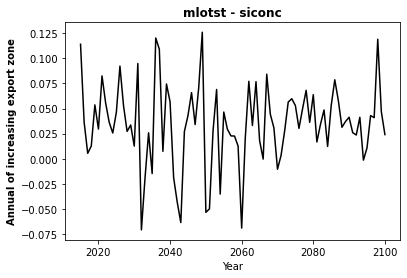

In [25]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc, 'k')
plt.title("{} - siconc".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_siconc_{}_annual_inc_correlation.png".format(model, variable, model))

plt.show()

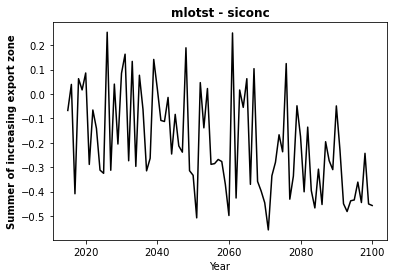

In [26]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc_summer, 'k')
plt.title("{} - siconc".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_siconc_{}_summer_inc_correlation.png".format(model, variable, model))

plt.show()

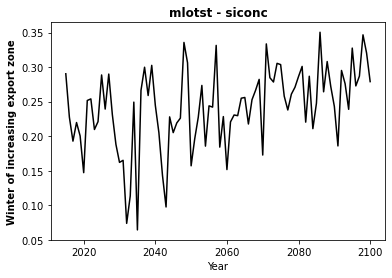

In [27]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc_winter, 'k')
plt.title("{} - siconc".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_siconc_{}_winter_inc_correlation.png".format(model, variable, model))

plt.show()

#### Decreasing zone


In [28]:
current_dec = xarray.open_dataarray("Data/{}_{}_{}_dec.nc".format(variable, model, experiment),decode_coords="all")
current_dec

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'mlotst' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    spatial_ref  int64 ...
Attributes:
    standard_name:       ocean_mixed_layer_thickness_defined_by_sigma_t
    long_name:           Ocean Mixed Layer Thickness Defined by Sigma T
    units:               m
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    description:         Sigma T is potential density referenced to ocean sur...
    history:             none

In [29]:
epc_dec = xarray.open_dataarray("Data/siconc_{}_{}_dec.nc".format(model, experiment), decode_coords="all")
epc_dec

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'siconc' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    spatial_ref  int64 ...
Attributes:
    standard_name:       sea_ice_area_fraction
    long_name:           Sea Ice Area Fraction (Ocean Grid)
    units:               %
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    description:         Area fraction of grid cell covered by sea ice
    history:             none

In [30]:
cor_dec = xarray.corr(current_dec, epc_dec, dim = ["lat", "lon"])
cor_dec = cor_dec.groupby("time.year").mean("time")
cor_dec

<xarray.DataArray (year: 86)>
array([-0.0759782 , -0.07580509, -0.0124156 , -0.06756654, -0.06207171,
       -0.10080748, -0.01679776, -0.06687942, -0.08289193, -0.00465594,
       -0.06942811, -0.06544805, -0.11161355, -0.13528435, -0.09784217,
       -0.13980635, -0.16197995, -0.20767918, -0.10935629, -0.13658328,
       -0.25951524, -0.14237842, -0.11533408, -0.10804914, -0.08831386,
       -0.14836372, -0.21900756, -0.14240465, -0.17217617, -0.1514861 ,
       -0.16762446, -0.09997214, -0.0623433 , -0.11155833, -0.19165421,
       -0.13882404, -0.1358629 , -0.17579196, -0.18760835, -0.22092011,
       -0.13181319, -0.09525381, -0.15199594, -0.13537429, -0.18486167,
       -0.3067199 , -0.17931388, -0.09129843, -0.0944762 , -0.2264545 ,
       -0.17048218, -0.17962413, -0.1871413 , -0.175698  , -0.16156936,
       -0.19801465, -0.1476128 , -0.18053709, -0.20744988, -0.13726407,
       -0.21639408, -0.13904726, -0.2428162 , -0.10521145, -0.16330815,
       -0.1814337 , -0.16305067, -0.13876028, -0.14317542, -0.17617479,
       -0.13987309, -0.06355278, -0.09792503, -0.12000466, -0.12106442,
       -0.14894269, -0.11809861, -0.13959332, -0.17994946, -0.12616362,
       -0.11210868, -0.13069922, -0.12762721,  0.00875927, -0.1237418 ,
       -0.13836091])
Coordinates:
    spatial_ref  int64 0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100

In [31]:
time = cor_dec["year"].values

In [32]:
current_dec_season = current_dec.resample(time='QS-DEC').mean(dim="time")
current_dec_season['time']

<xarray.DataArray 'time' (time: 345)>
array(['2014-12-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000', ..., '2100-06-01T00:00:00.000000000',
       '2100-09-01T00:00:00.000000000', '2100-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2014-12-01 2015-03-01 ... 2100-12-01
    spatial_ref  int64 0

In [33]:
current_dec_summer = current_dec_season.sel(time=(current_dec_season.time.dt.month == 12))
current_dec_summer = current_dec_summer.sel(time = slice("2015","2100"))

In [34]:
current_dec_winter = current_dec_season.sel(time=(current_dec_season.time.dt.month == 6))

In [35]:
epc_dec_season = epc_dec.resample(time='QS-DEC').mean(dim="time")

In [36]:
epc_dec_summer = epc_dec_season.sel(time=(epc_dec_season.time.dt.month == 12))
epc_dec_summer = epc_dec_summer.sel(time = slice("2015","2100"))
epc_dec_winter = epc_dec_season.sel(time=(epc_dec_season.time.dt.month == 6))

In [37]:
cor_dec_summer = xarray.corr(current_dec_summer, epc_dec_summer, dim = ["lat", "lon"])
cor_dec_summer

<xarray.DataArray (time: 86)>
array([-0.5449217 , -0.51456172, -0.48486311, -0.55568235, -0.54441407,
       -0.51085802, -0.48932536, -0.57243479, -0.58228179, -0.58310305,
       -0.58048278, -0.2079737 , -0.56354038, -0.53652998, -0.62436967,
       -0.60662057, -0.39390981, -0.54627882, -0.54558408, -0.56285293,
       -0.62932963, -0.54315288, -0.6230673 , -0.56280511, -0.25717105,
       -0.54434507, -0.52039226, -0.53246554, -0.60456502, -0.53696804,
       -0.50334398, -0.50630822, -0.56395588, -0.45991179, -0.55867609,
       -0.4766102 , -0.55882098, -0.59238755, -0.60852014, -0.61497977,
       -0.61304605, -0.55206566, -0.53109332, -0.52365415, -0.58768852,
       -0.54006602, -0.32691488, -0.53676685, -0.38556395, -0.56480755,
       -0.53877906, -0.55765084, -0.5391225 , -0.49820744, -0.49523393,
       -0.50676694, -0.5633581 , -0.4930295 , -0.5489066 , -0.53538818,
       -0.45824535, -0.46941383, -0.54041338, -0.55108729, -0.42744387,
       -0.4379853 , -0.47371236, -0.49421473, -0.52926958, -0.55298499,
       -0.48251321, -0.46602096, -0.40662298, -0.45206679, -0.4150542 ,
       -0.45586299, -0.43947451, -0.54571643, -0.56096318, -0.51928189,
       -0.5455847 , -0.38223282, -0.44922347, -0.38282   , -0.36907069,
       -0.42615965])
Coordinates:
  * time         (time) datetime64[ns] 2015-12-01 2016-12-01 ... 2100-12-01
    spatial_ref  int64 0

In [38]:
cor_dec_winter = xarray.corr(current_dec_winter, epc_dec_winter, dim = ["lat", "lon"])
cor_dec_winter

<xarray.DataArray (time: 86)>
array([ 0.12364374,  0.09792245,  0.1735942 ,  0.14689856,  0.15696271,
       -0.04767491,  0.24402456,  0.18966378,  0.10653553,  0.23578739,
        0.18130587, -0.06158614,  0.01708069, -0.03365537,  0.12176556,
       -0.21991468, -0.30387687, -0.29491171,  0.08197663,  0.1402983 ,
       -0.38370788, -0.14557561,  0.02531497, -0.01708411, -0.07228755,
       -0.13818494, -0.29031059, -0.07759971, -0.22733665, -0.14726139,
       -0.19030422, -0.0907466 ,  0.03662174, -0.10219635, -0.17331379,
       -0.12576802, -0.04674474, -0.10383323, -0.18654284, -0.24767497,
       -0.01062161, -0.05131949, -0.20769973, -0.07289962, -0.18079493,
       -0.41026671, -0.25365912, -0.041082  , -0.14956247, -0.26906133,
       -0.09804459, -0.09996887, -0.25051428, -0.19805485, -0.10721495,
       -0.32200575, -0.09621618, -0.11643115, -0.17369865, -0.13089376,
       -0.2087876 , -0.10224919, -0.24610638, -0.0991811 , -0.20750944,
       -0.21947142, -0.06333893, -0.131732  , -0.08824514, -0.21989374,
       -0.14620163,  0.04006313, -0.05029203, -0.03808999, -0.07827471,
       -0.03373139, -0.08887161, -0.09056994, -0.22532734, -0.10128274,
        0.00996821, -0.17320611, -0.04064404,  0.07119684,  0.0112452 ,
       -0.04814505])
Coordinates:
  * time         (time) datetime64[ns] 2015-06-01 2016-06-01 ... 2100-06-01
    spatial_ref  int64 0

In [39]:
data = {'Year': time,
        'Annual': cor_dec,
        'Summer': cor_dec_summer,
        'Winter': cor_dec_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,-0.075978,-0.544922,0.123644,IPSL-CM6A-LR
1,2016,-0.075805,-0.514562,0.097922,IPSL-CM6A-LR
2,2017,-0.012416,-0.484863,0.173594,IPSL-CM6A-LR
3,2018,-0.067567,-0.555682,0.146899,IPSL-CM6A-LR
4,2019,-0.062072,-0.544414,0.156963,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,-0.130699,-0.382233,-0.173206,IPSL-CM6A-LR
82,2097,-0.127627,-0.449223,-0.040644,IPSL-CM6A-LR
83,2098,0.008759,-0.382820,0.071197,IPSL-CM6A-LR
84,2099,-0.123742,-0.369071,0.011245,IPSL-CM6A-LR


In [40]:
df.to_csv("csv/{}_{}_siconc_correlation_dec.csv".format(model, variable), index = False, header=True)

In [43]:
dec_mean = np.nanmean(cor_dec.values)
dec_mean_summer = np.nanmean(cor_dec_summer.values)
dec_mean_winter = np.nanmean(cor_dec_winter.values)

dec_max = np.nanmax(cor_dec.values)
dec_max_summer = np.nanmax(cor_dec_summer.values)
dec_max_winter = np.nanmax(cor_dec_winter.values)

dec_min = np.nanmin(cor_dec.values)
dec_min_summer = np.nanmin(cor_dec_summer.values)
dec_min_winter = np.nanmin(cor_dec_winter.values)

In [44]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nSpatial correlation with siconc in decreasing zone:\n")
summary.write("Annual mean: {}\nAnnual max: {}\nAnnual min: {}".format(dec_mean, dec_max, dec_min))
summary.write("\n\nSummer mean: {}\nSummer max: {}\nSummer min: {}".format(dec_mean_summer, dec_max_summer, dec_min_summer))
summary.write("\n\nWinter mean: {}\nWinter max: {}\nWinter min: {}".format(dec_mean_winter, dec_max_winter, dec_min_winter))
summary.close()

#### Plotting

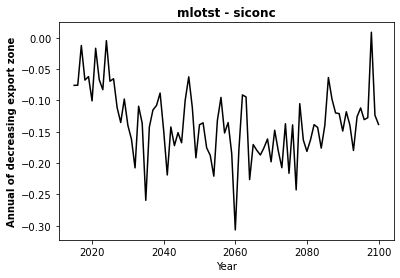

In [41]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec, 'k')
plt.title("{} - siconc".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_siconc_{}_annual_dec_correlation.png".format(model, variable, model))

plt.show()

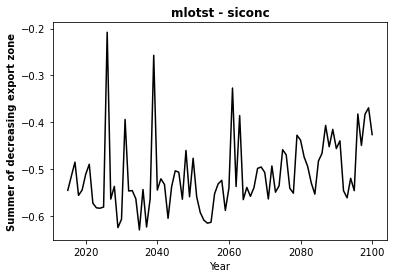

In [42]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec_summer, 'k')
plt.title("{} - siconc".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_siconc_{}_summer_dec_correlation.png".format(model, variable, model))

plt.show()

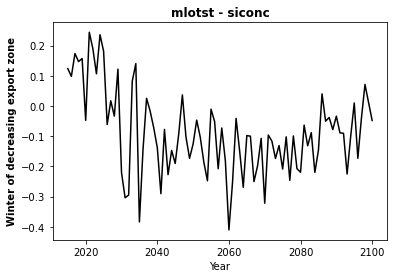

In [43]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec_winter, 'k')
plt.title("{} - siconc".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_siconc_{}_winter_dec_correlation.png".format(model, variable, model))

plt.show()